In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('train 2.csv',parse_dates=['date'])
df

date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [4]:
df.drop('store',axis=1,inplace=True)#dropping store col as as our problem statement focused on item demand but not on stores.

In [5]:
d1=df.groupby(['item','date'])['sales'].sum()#Grouping data based on item and date to get total sales of item on each day.

In [6]:
type(d1)

pandas.core.series.Series

In [7]:
d2=d1.to_frame()#changing to dataframe

In [8]:
type(d2)

pandas.core.frame.DataFrame

In [9]:
d2

sales
item date             
1    2013-01-01    133
     2013-01-02     99
     2013-01-03    127
     2013-01-04    145
     2013-01-05    149
...                ...
50   2017-12-27    511
     2017-12-28    587
     2017-12-29    596
     2017-12-30    612
     2017-12-31    626

[91300 rows x 1 columns]

In [10]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 91300 entries, (1, Timestamp('2013-01-01 00:00:00')) to (50, Timestamp('2017-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   91300 non-null  int64
dtypes: int64(1)
memory usage: 995.5 KB


In [11]:
d2.reset_index(inplace=True)
d2.set_index('date',inplace=True)#making only date as index

In [12]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91300 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    91300 non-null  int64
 1   sales   91300 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB


<AxesSubplot:xlabel='date'>

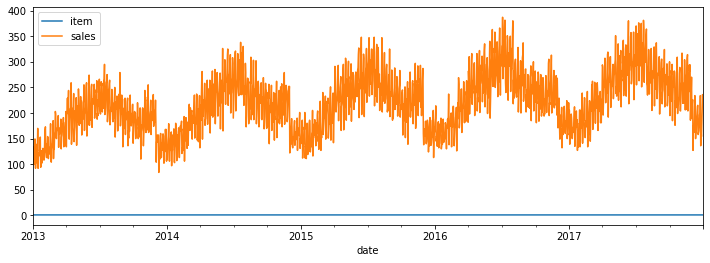

In [13]:
d2[d2['item']==1].plot(figsize=(12,4))#plotting item1 sales

### Let us plot 90day sales data of all the items

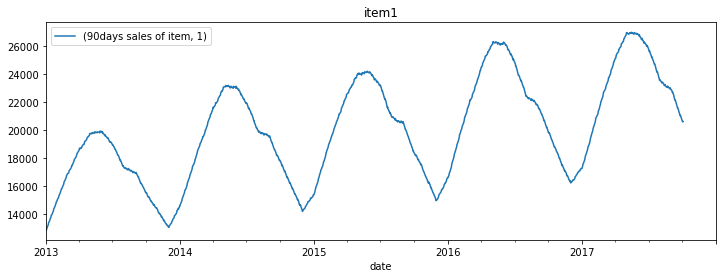

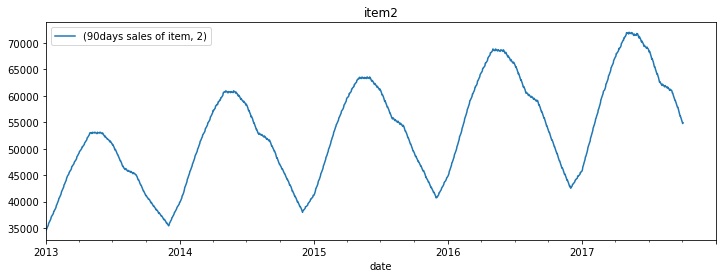

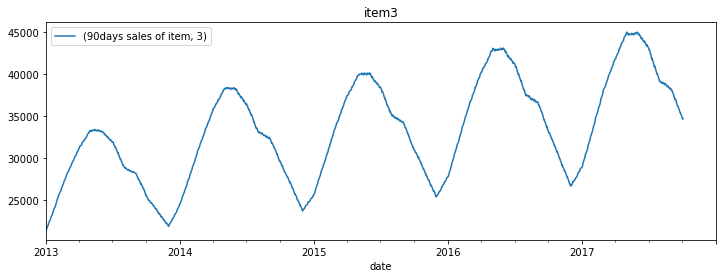

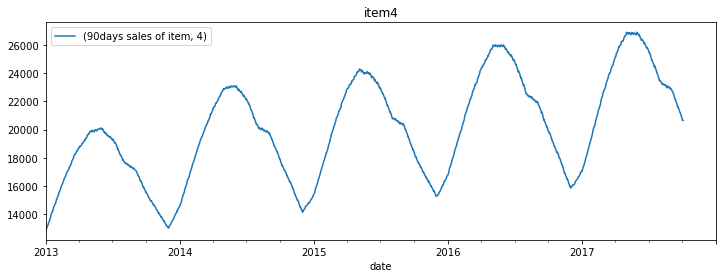

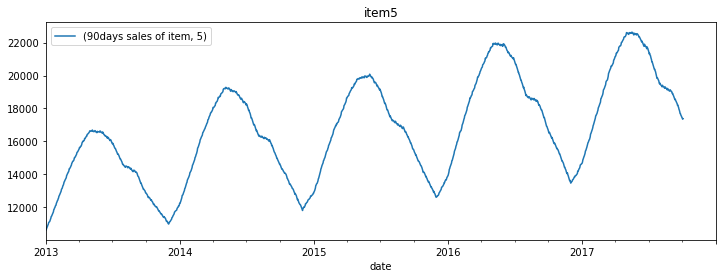

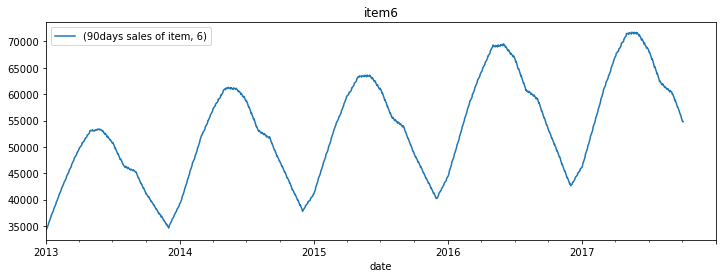

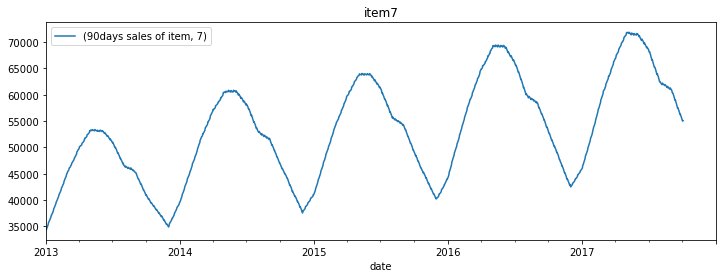

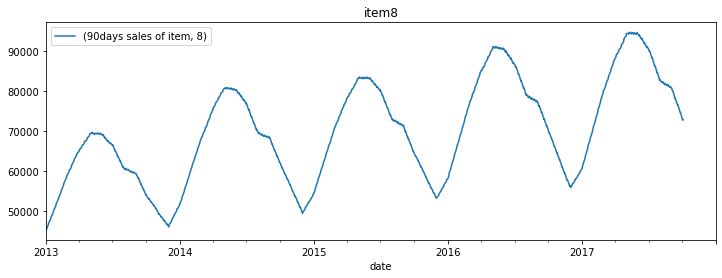

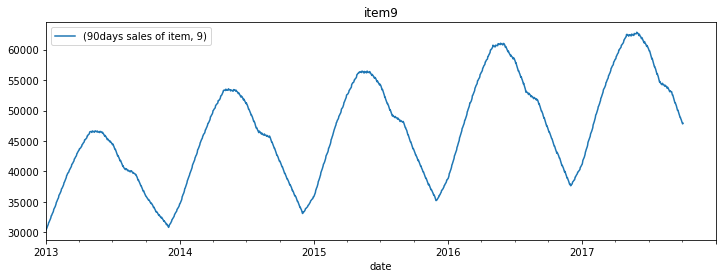

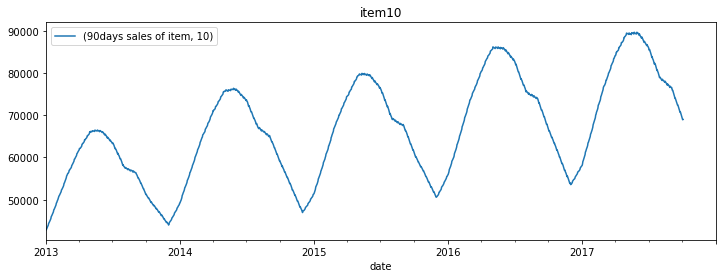

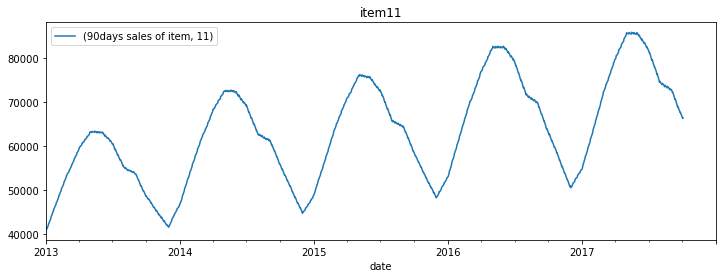

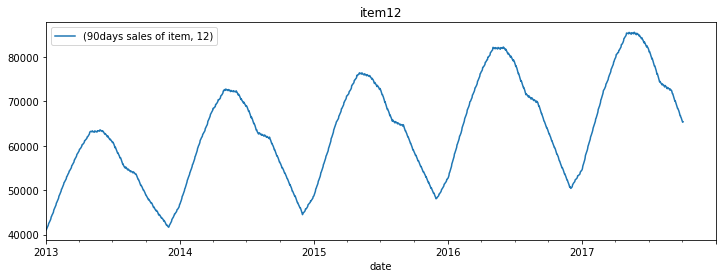

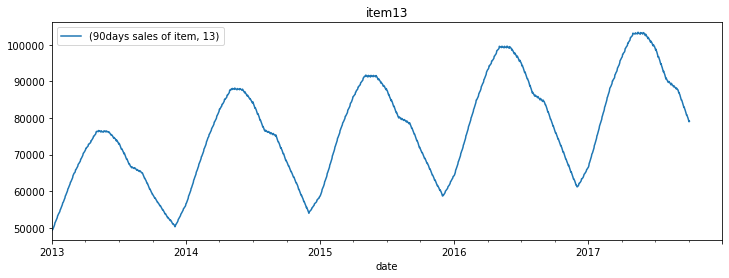

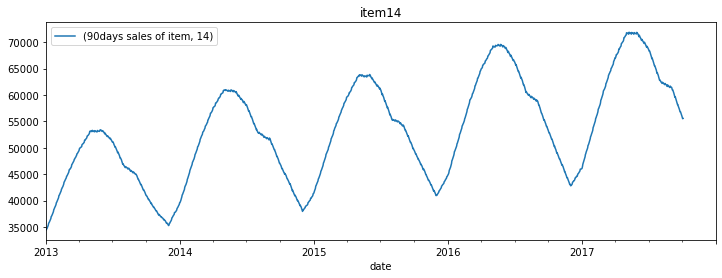

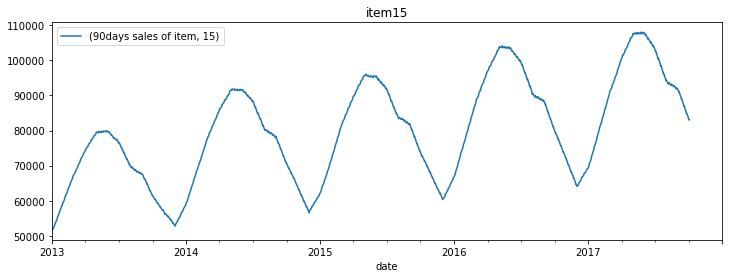

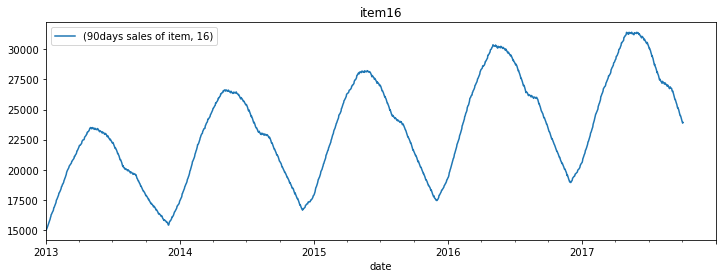

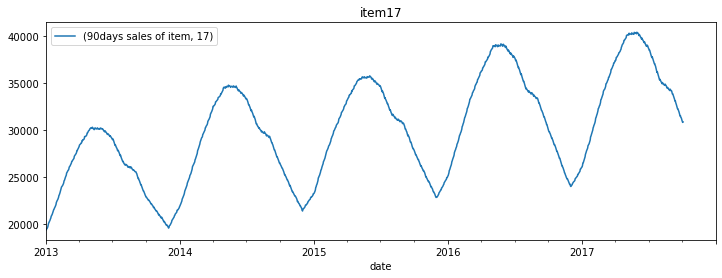

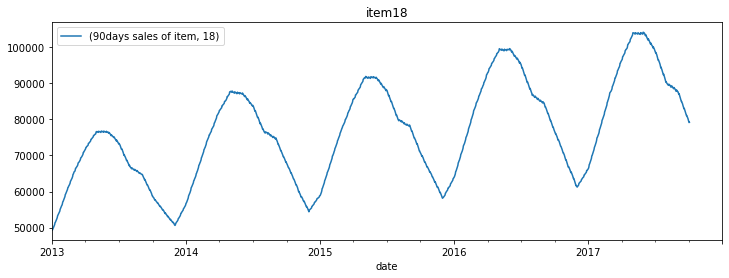

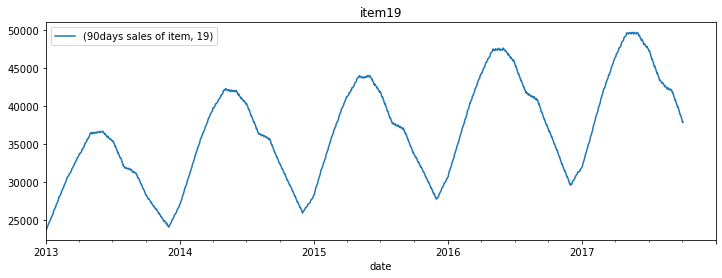

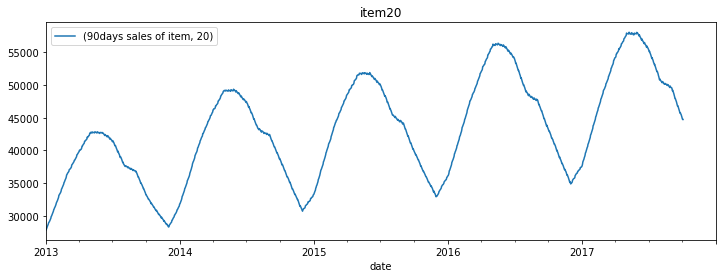

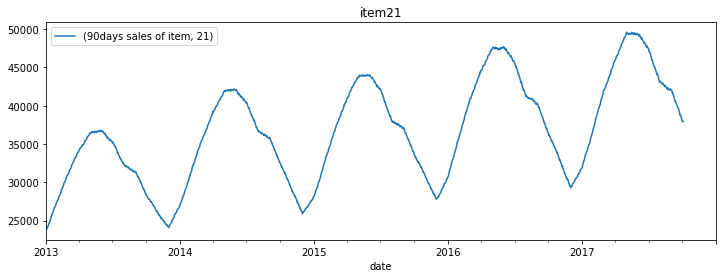

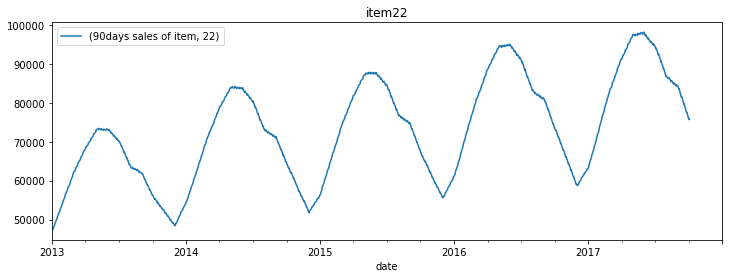

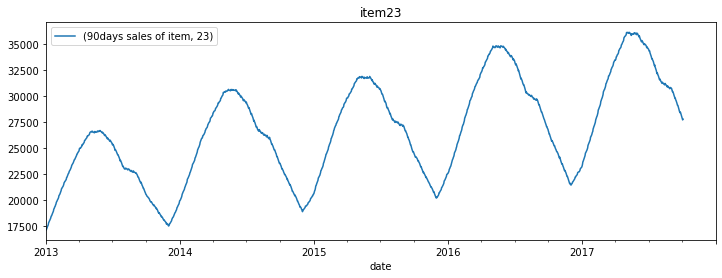

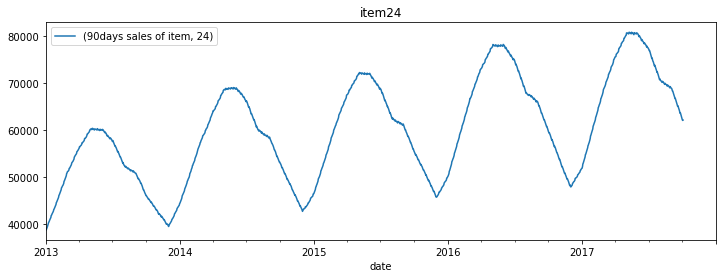

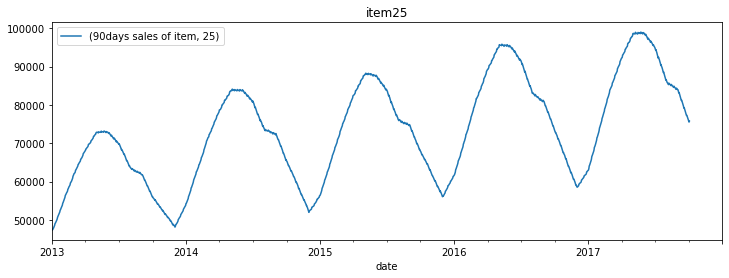

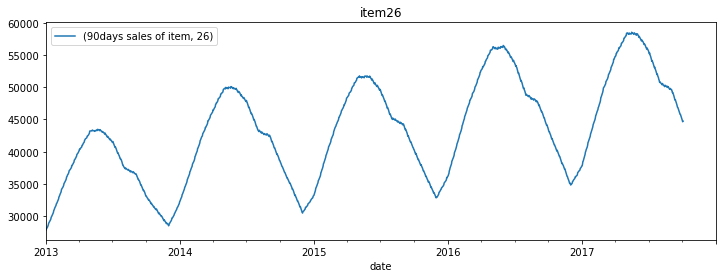

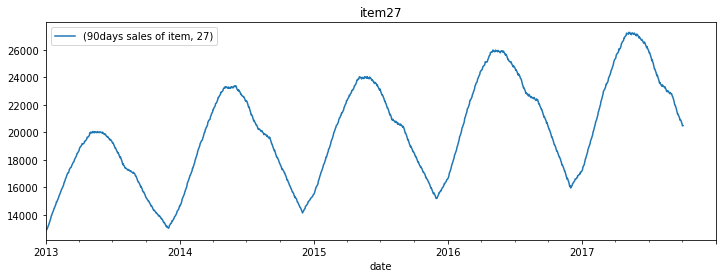

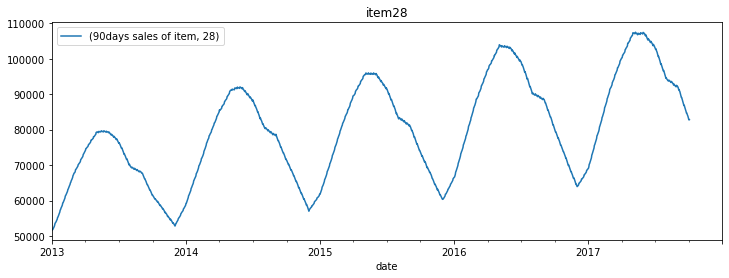

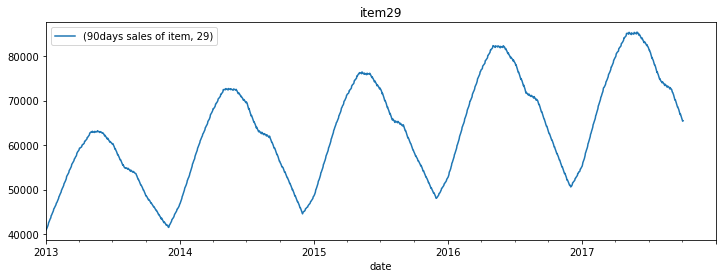

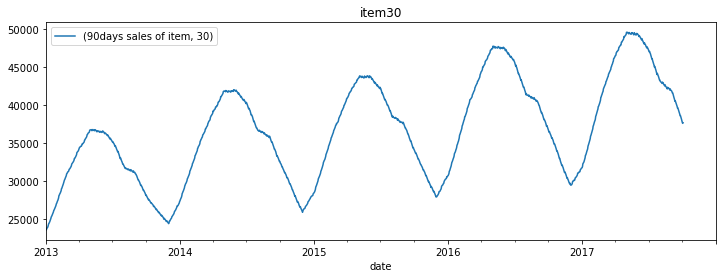

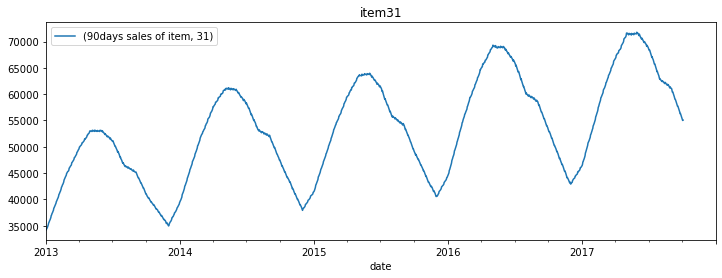

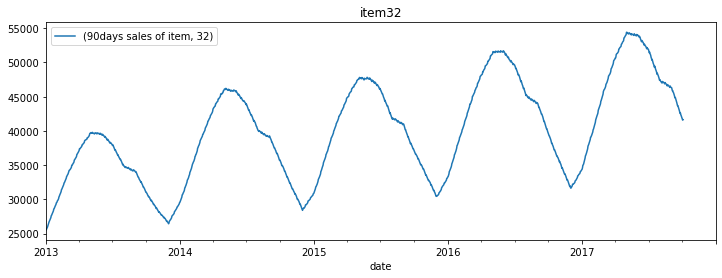

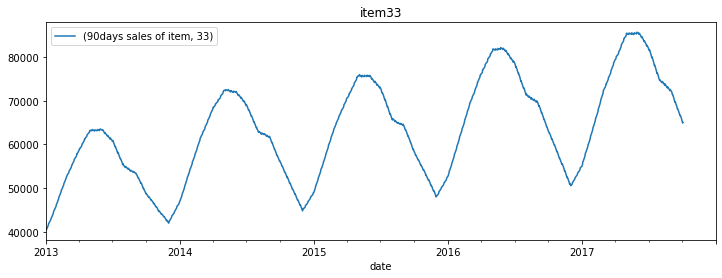

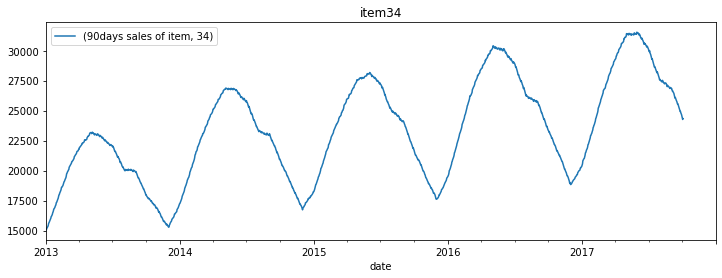

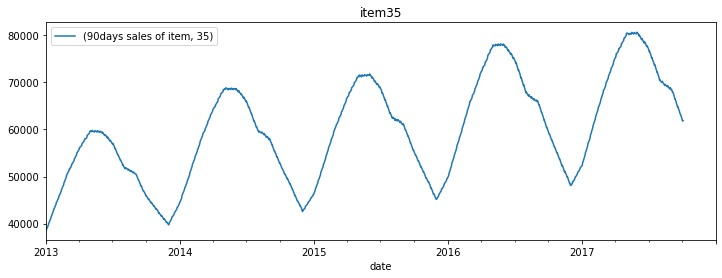

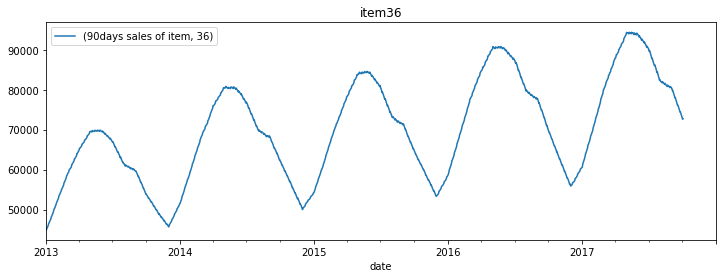

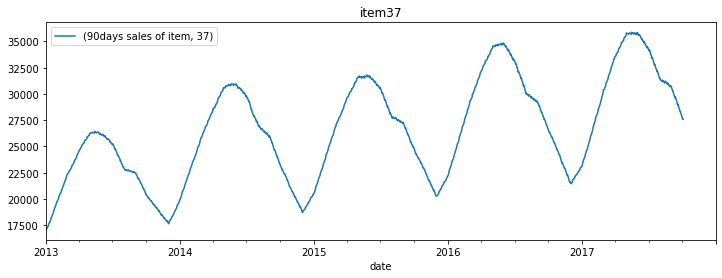

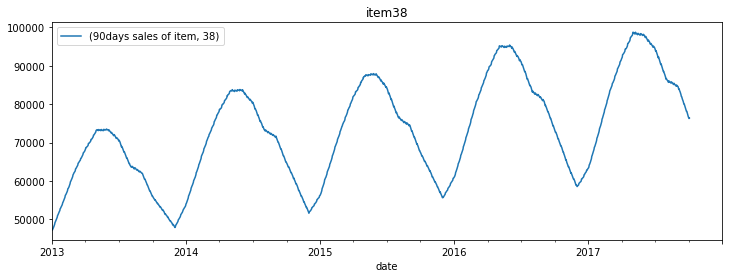

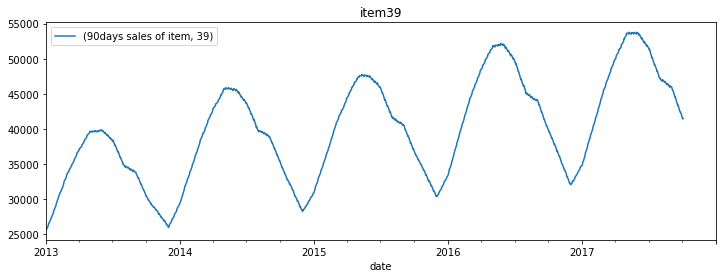

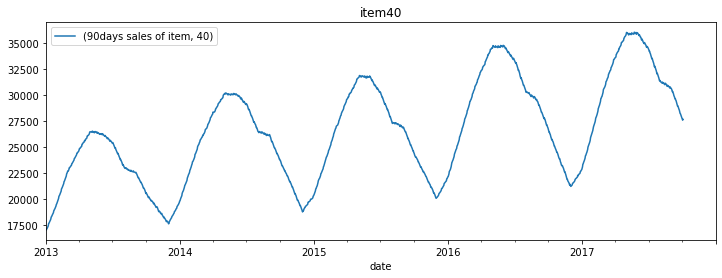

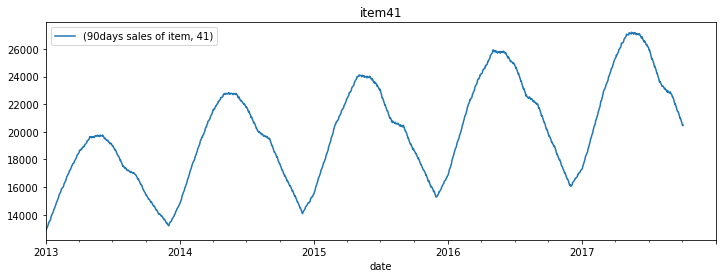

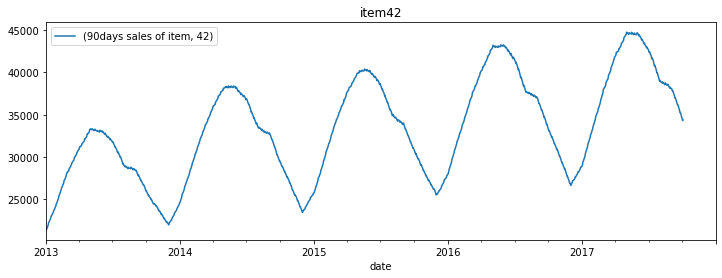

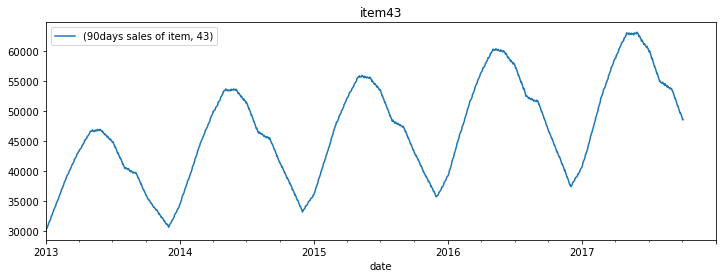

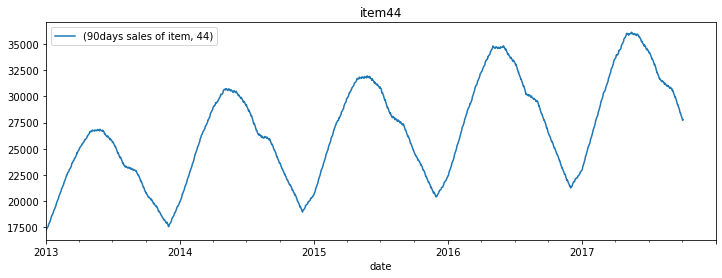

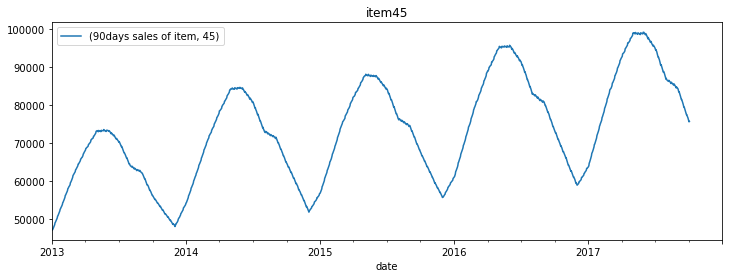

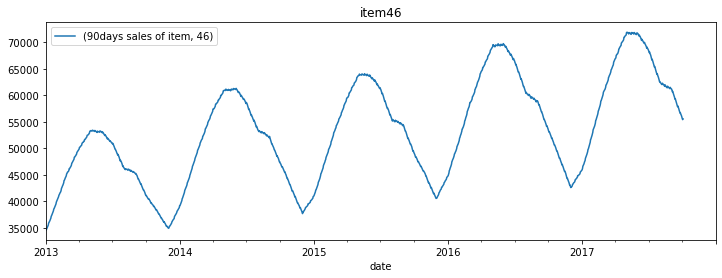

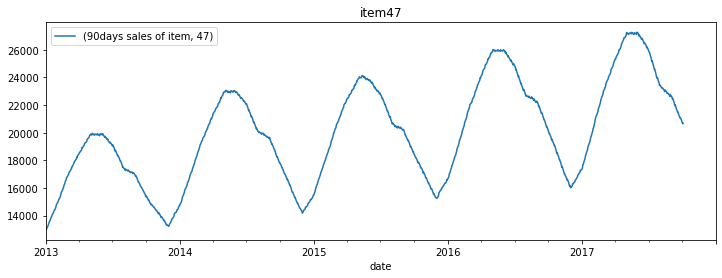

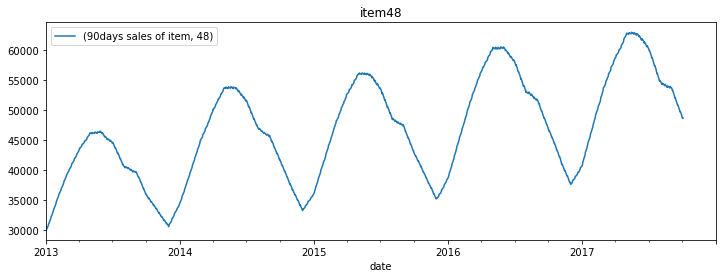

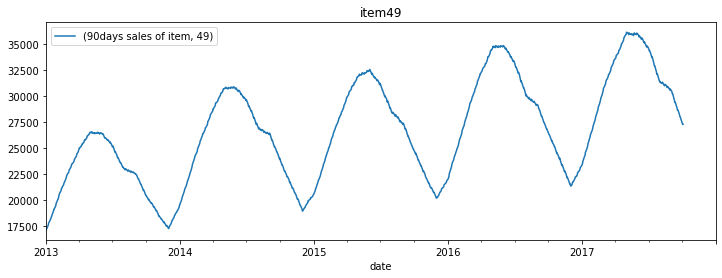

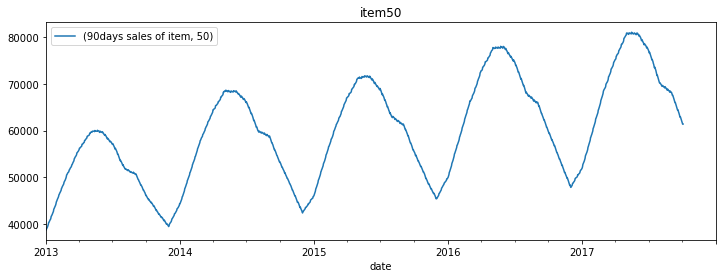

In [14]:
for i in range(1,51):
    item=d2[d2['item']==i]
    item['90days sales of item',i]=item['sales'].rolling(90).sum().shift(-89)
    item.drop(['item','sales'],axis=1,inplace=True)
    item.plot(figsize=(12,4),title='item'+str(i))

### First let us look into item1 sales data

In [15]:
df_item1=d2[d2['item']==1]
df_item1['90day_sales']=df_item1['sales'].rolling(90).sum()
df_item1=df_item1.shift(-89)
df_item1=df_item1.iloc[::7]
df_item1.drop(['item','sales'],axis=1,inplace=True)
df_item1# it gives information about next 90days sales data of item1.

90day_sales
date                   
2013-01-01      12847.0
2013-01-08      13375.0
2013-01-15      13891.0
2013-01-22      14356.0
2013-01-29      14866.0
...                 ...
2017-11-28          NaN
2017-12-05          NaN
2017-12-12          NaN
2017-12-19          NaN
2017-12-26          NaN

[261 rows x 1 columns]

<AxesSubplot:xlabel='date'>

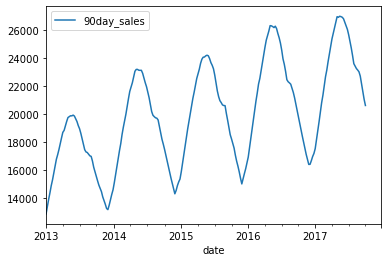

In [16]:
df_item1.plot()

In [17]:
df_item1.reset_index(inplace=True)

In [18]:
df_item1['day']=df_item1['date'].dt.day
df_item1['week']=df_item1['date'].dt.week
df_item1['year']=df_item1['date'].dt.year

In [19]:
df_item1.dropna(inplace=True)

In [20]:
df_item1.set_index('date',inplace=True)

In [22]:
X_train=df_item1.drop(['90day_sales'],axis=1).iloc[:200]
X_test=df_item1.drop(['90day_sales'],axis=1).iloc[200:]

Y_train=df_item1['90day_sales'].iloc[:200]
Y_test=df_item1['90day_sales'].iloc[200:]#making train and test datasets

In [24]:
X_test

day  week  year
date                       
2016-11-01    1    44  2016
2016-11-08    8    45  2016
2016-11-15   15    46  2016
2016-11-22   22    47  2016
2016-11-29   29    48  2016
2016-12-06    6    49  2016
2016-12-13   13    50  2016
2016-12-20   20    51  2016
2016-12-27   27    52  2016
2017-01-03    3     1  2017
2017-01-10   10     2  2017
2017-01-17   17     3  2017
2017-01-24   24     4  2017
2017-01-31   31     5  2017
2017-02-07    7     6  2017
2017-02-14   14     7  2017
2017-02-21   21     8  2017
2017-02-28   28     9  2017
2017-03-07    7    10  2017
2017-03-14   14    11  2017
2017-03-21   21    12  2017
2017-03-28   28    13  2017
2017-04-04    4    14  2017
2017-04-11   11    15  2017
2017-04-18   18    16  2017
2017-04-25   25    17  2017
2017-05-02    2    18  2017
2017-05-09    9    19  2017
2017-05-16   16    20  2017
2017-05-23   23    21  2017
2017-05-30   30    22  2017
2017-06-06    6    23  2017
2017-06-13   13    24  2017
2017-06-20   20    25  2017
2017-06-27   27    26  2017
2017-07-04    4    27  2017
2017-07-11   11    28  2017
2017-07-18   18    29  2017
2017-07-25   25    30  2017
2017-08-01    1    31  2017
2017-08-08    8    32  2017
2017-08-15   15    33  2017
2017-08-22   22    34  2017
2017-08-29   29    35  2017
2017-09-05    5    36  2017
2017-09-12   12    37  2017
2017-09-19   19    38  2017
2017-09-26   26    39  2017
2017-10-03    3    40  2017

In [25]:
lr=LinearRegression()
lr.fit(X_train,Y_train)#FittingLinearRegression model

LinearRegression()

<AxesSubplot:title={'center':'LinearRegression'}, xlabel='date', ylabel='sales'>

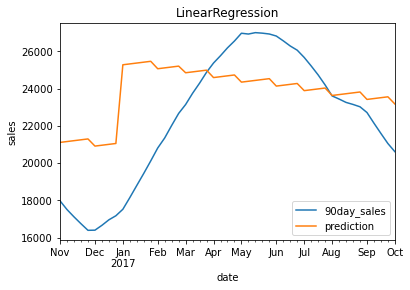

In [26]:
pred=lr.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='LinearRegression')

In [27]:
print('The r2 score achieved using LinearRegression is',r2_score(Y_test,pred))

The r2 score achieved using LinearRegression is 0.15886231040197052


In [28]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)#FittingRandomForestModel

RandomForestRegressor()

<AxesSubplot:title={'center':'RandomForest'}, xlabel='date', ylabel='sales'>

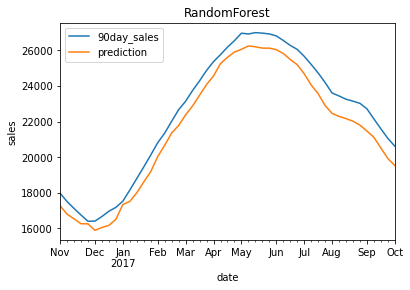

In [29]:
pred=rf.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='RandomForest')

In [30]:
print('The r2 score achieved using RandomForest is',r2_score(Y_test,pred))

The r2 score achieved using RandomForest is 0.9400042178028474


In [31]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)#FittingDecisionTreeModel

DecisionTreeRegressor()

<AxesSubplot:title={'center':'DecisionTree'}, xlabel='date', ylabel='sales'>

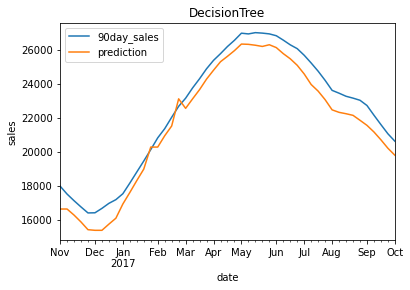

In [32]:
pred=dt.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='DecisionTree')

In [33]:
print('The r2 score achieved using DecisionTree is',r2_score(Y_test,pred))

The r2 score achieved using DecisionTree is 0.9398634991451451


In [34]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(X_train,Y_train)#FittingXGBoostModel

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'XGBoost'}, xlabel='date', ylabel='sales'>

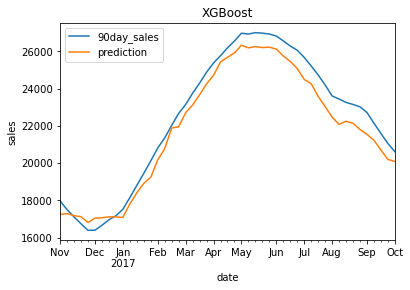

In [35]:
pred=xgb.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='XGBoost')

In [36]:
print('The r2 score achieved using XGBoost is',r2_score(Y_test,pred))

The r2 score achieved using XGBoost is 0.9540473207748267


In [37]:
p=[15,46,2016]
p=np.array(p).reshape((1,-1))
print('The predicted next 90day sales are ',xgb.predict(p))#prediction for 15-11-2016

The predicted next 90day sales are  [17177.441]


### Let us find best model for each item prediction and plot them

In [38]:
l=[]
r2=[]
best=[]

In [39]:
model=["LinearRegression","RandomForest","DecisionTree","XGBoost"]

The best r2_score for item1 achieved using XGBoost and score is 0.9540473207748267
The best r2_score for item2 achieved using DecisionTree and score is 0.9398144137783401
The best r2_score for item3 achieved using XGBoost and score is 0.9311782813928123
The best r2_score for item4 achieved using DecisionTree and score is 0.9508410826150193
The best r2_score for item5 achieved using XGBoost and score is 0.9490764417085646
The best r2_score for item6 achieved using XGBoost and score is 0.9529486312142672
The best r2_score for item7 achieved using XGBoost and score is 0.9478056391359179
The best r2_score for item8 achieved using DecisionTree and score is 0.935307411118522
The best r2_score for item9 achieved using XGBoost and score is 0.9465679534629465
The best r2_score for item10 achieved using XGBoost and score is 0.9268212323851286
The best r2_score for item11 achieved using DecisionTree and score is 0.9391549223222788
The best r2_score for item12 achieved using DecisionTree and score

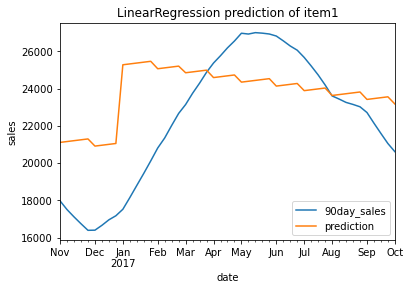

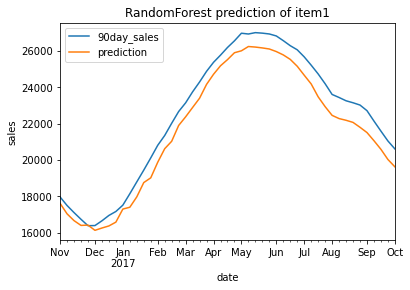

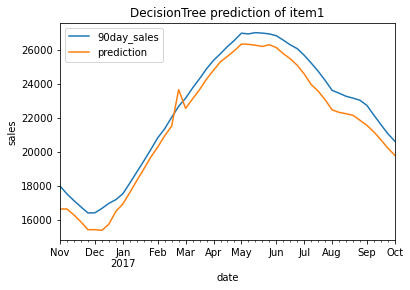

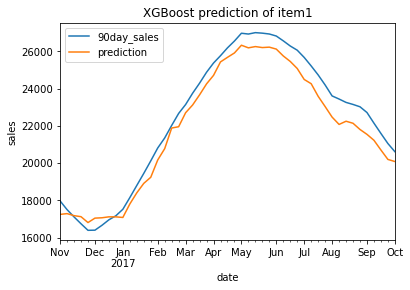

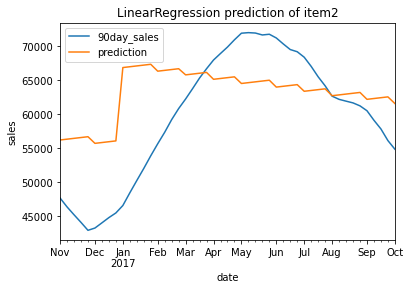

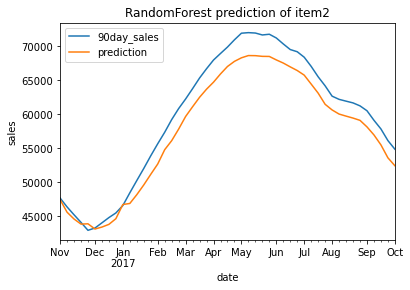

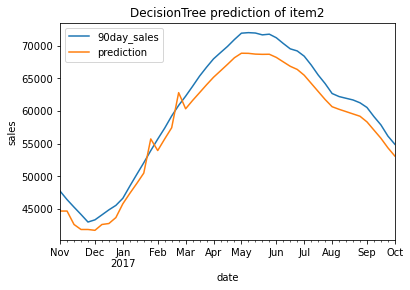

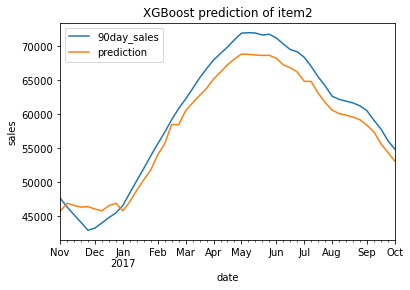

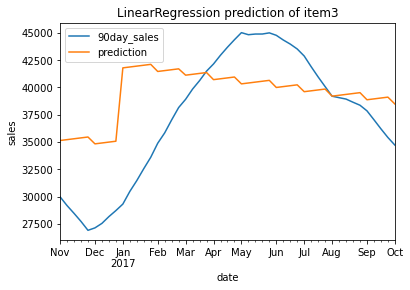

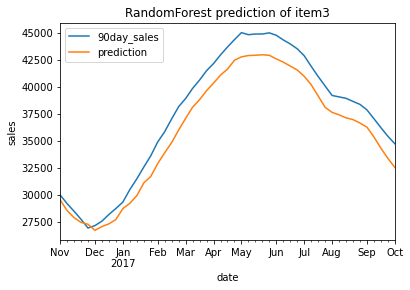

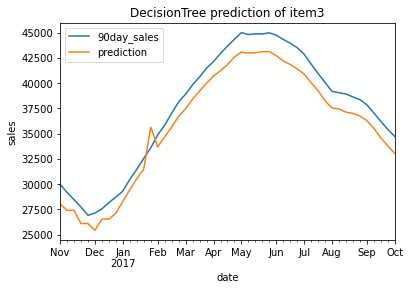

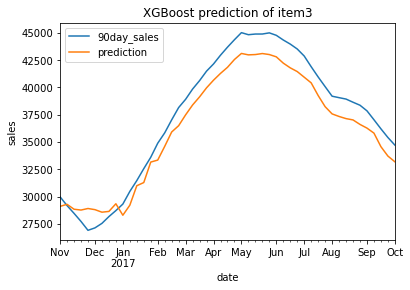

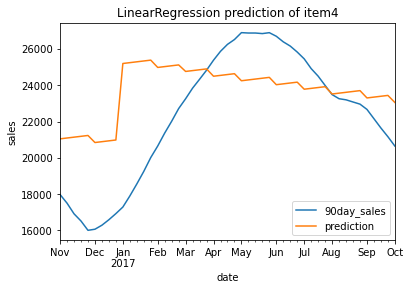

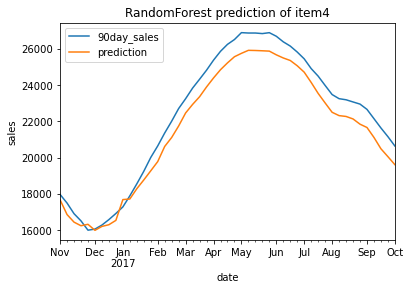

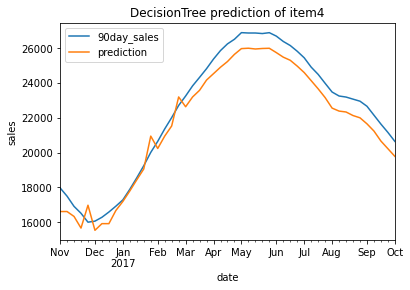

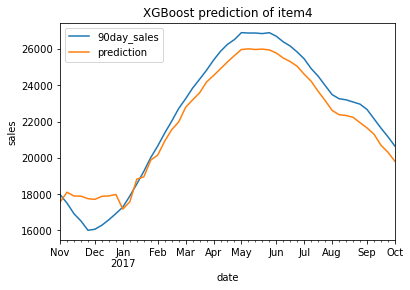

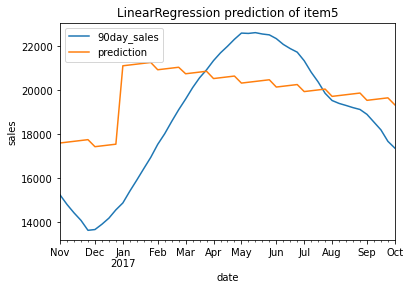

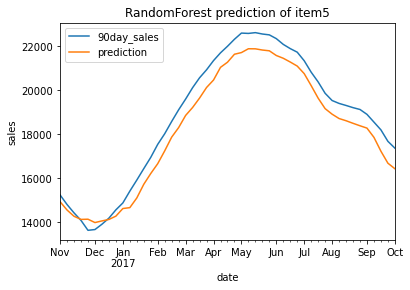

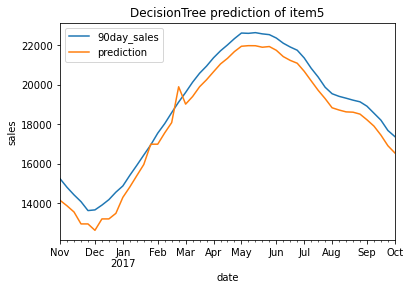

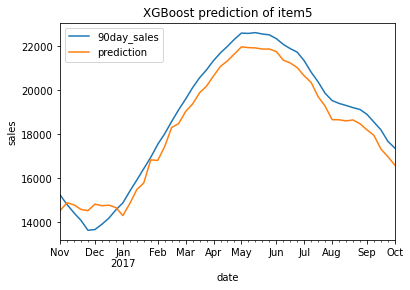

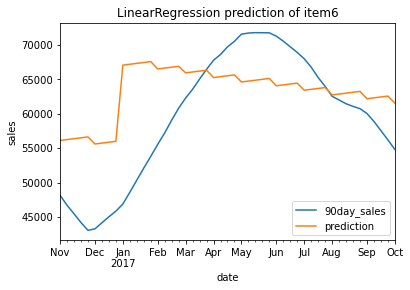

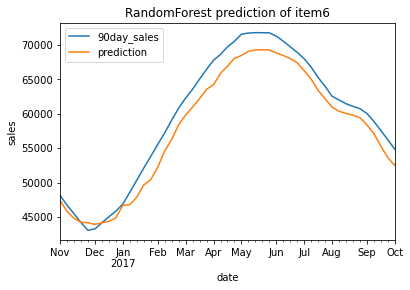

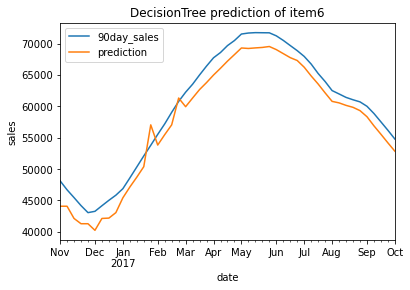

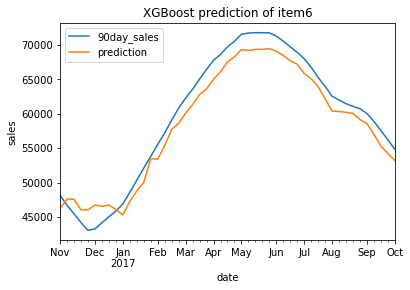

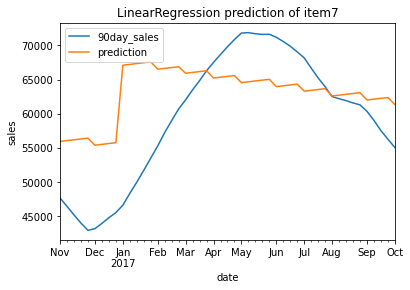

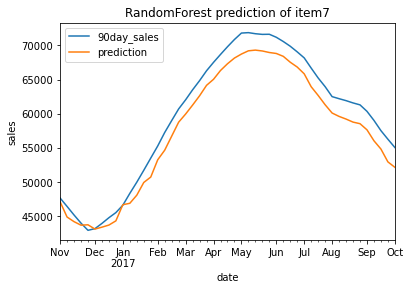

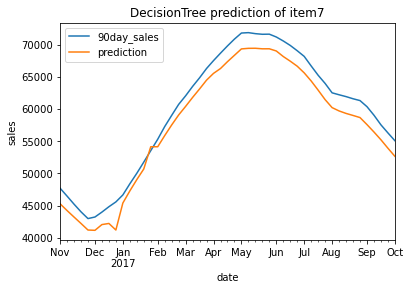

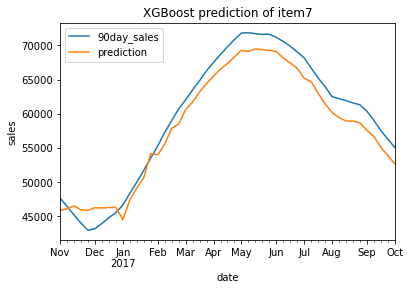

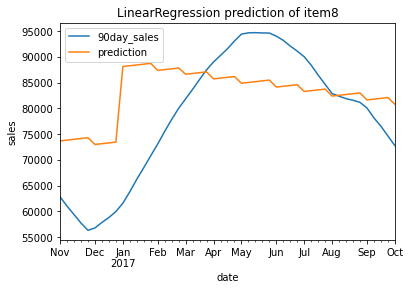

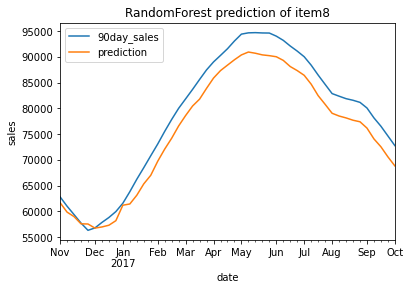

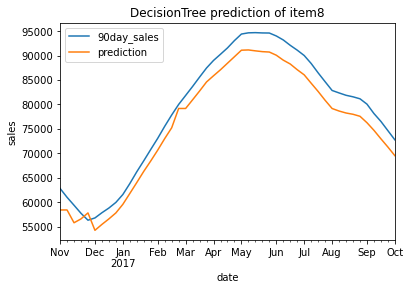

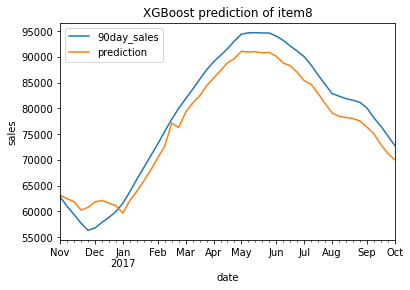

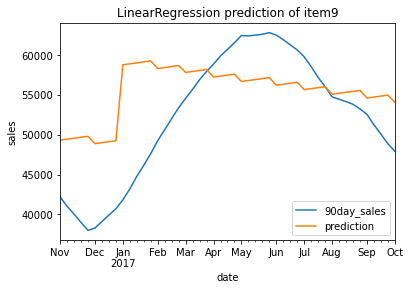

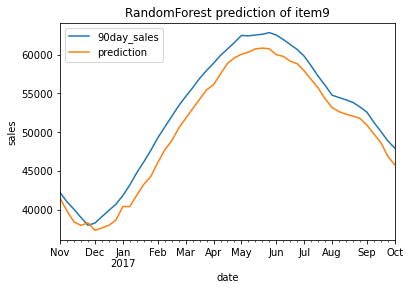

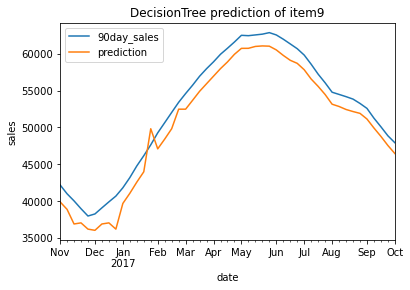

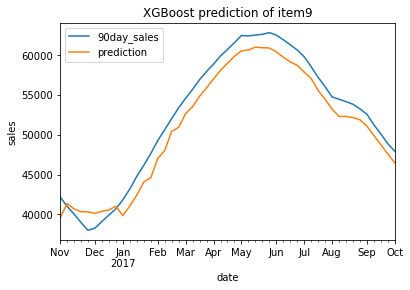

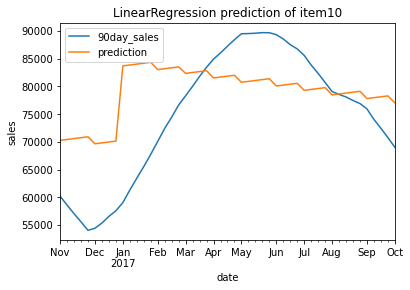

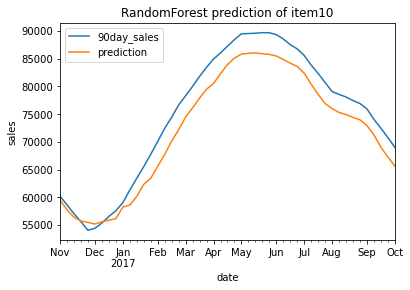

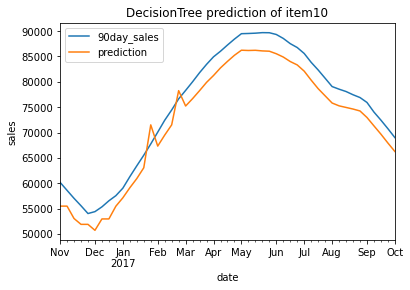

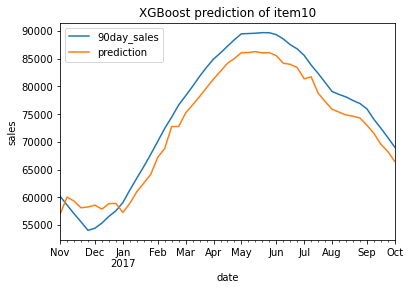

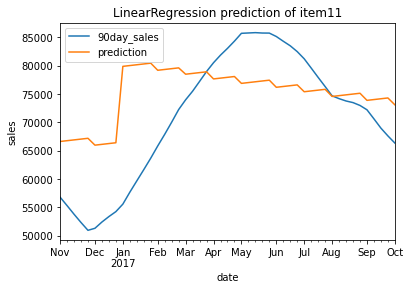

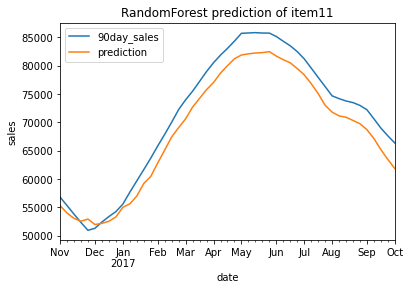

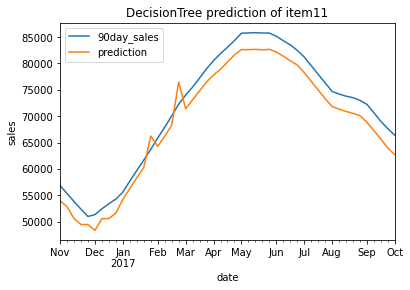

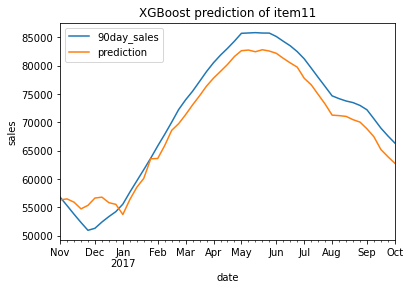

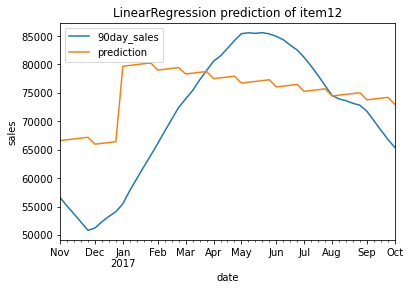

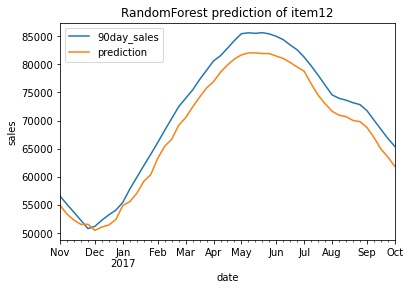

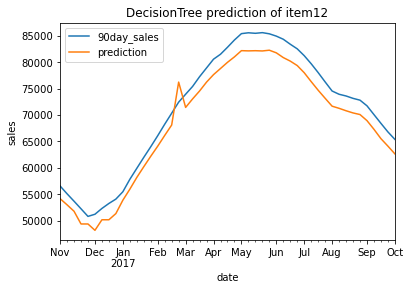

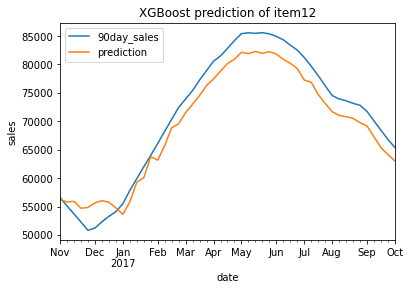

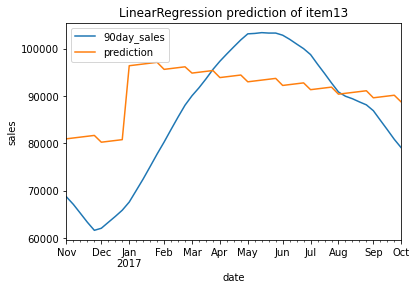

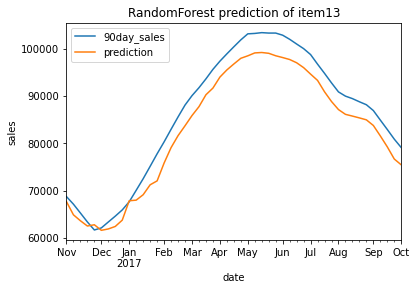

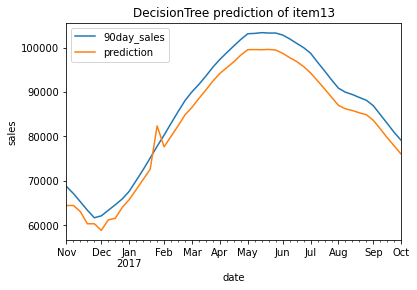

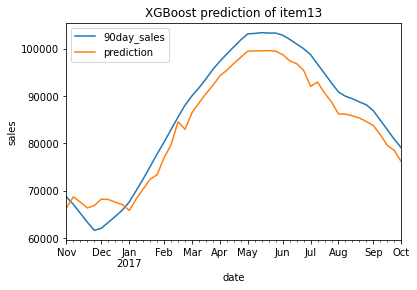

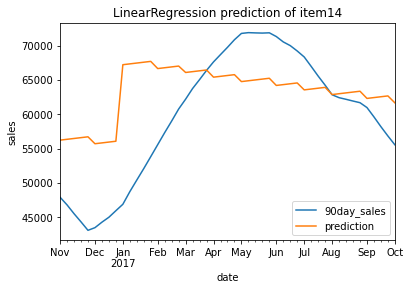

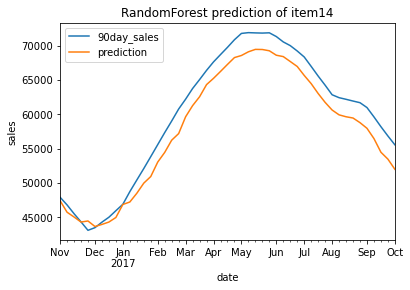

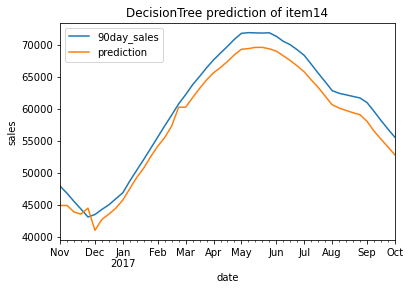

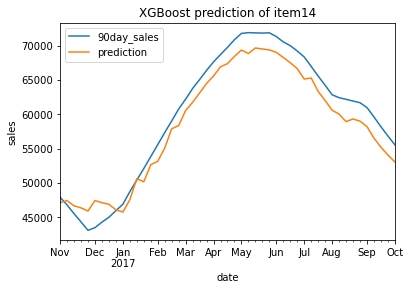

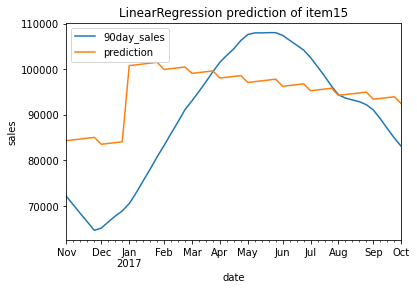

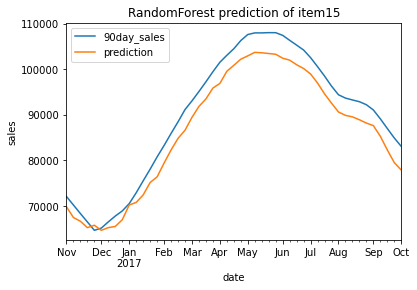

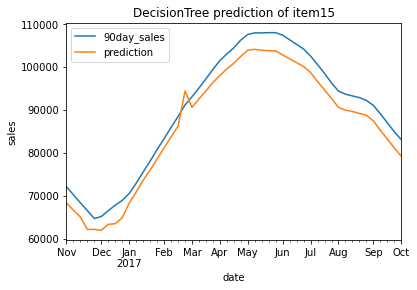

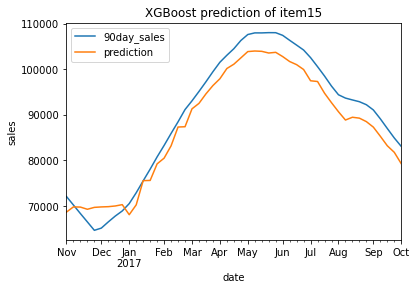

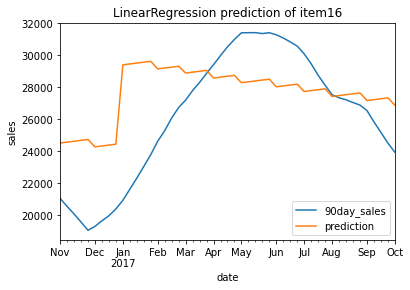

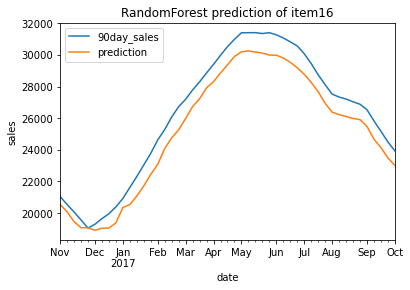

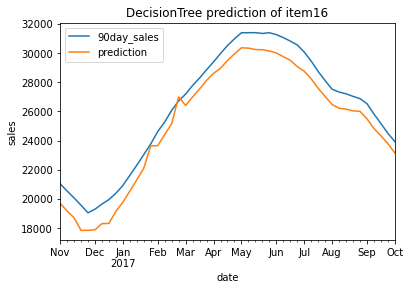

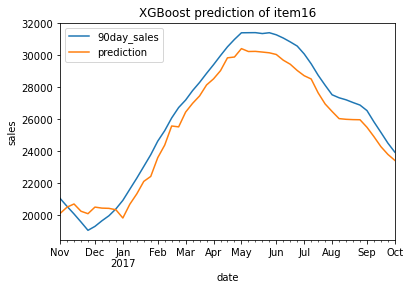

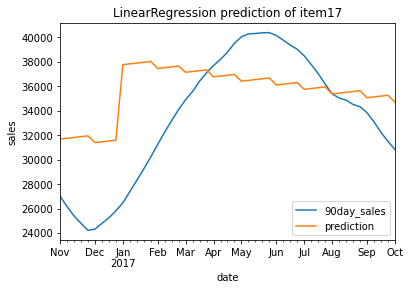

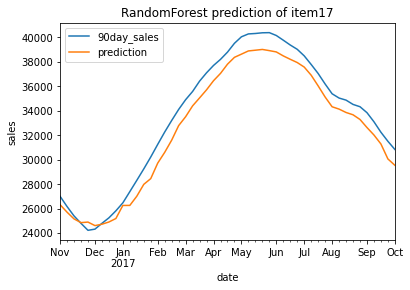

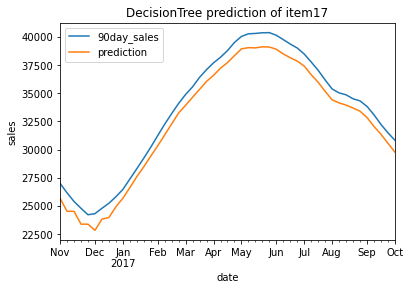

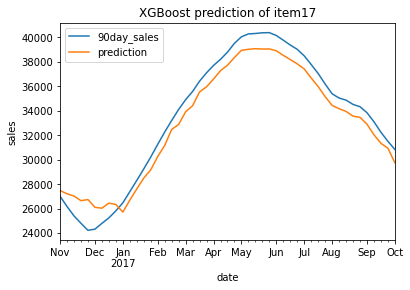

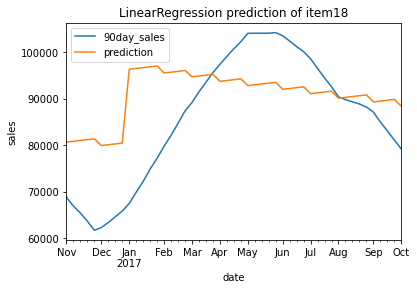

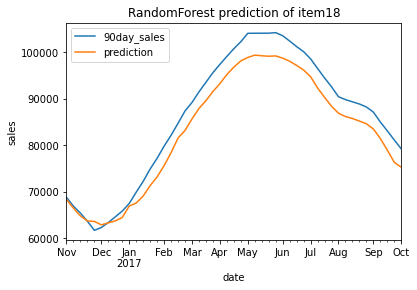

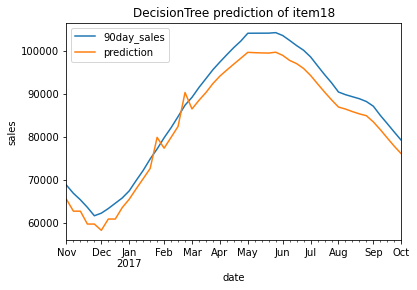

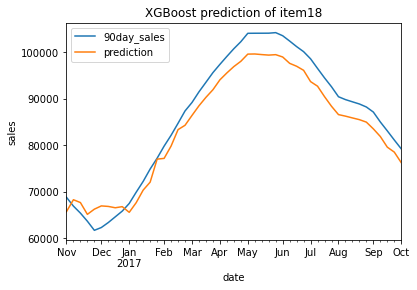

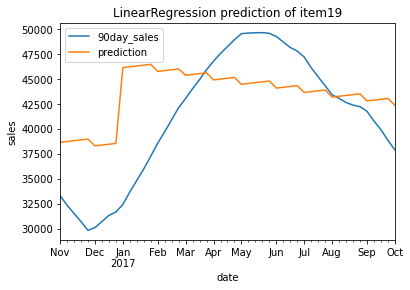

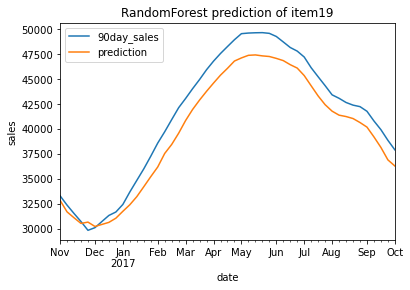

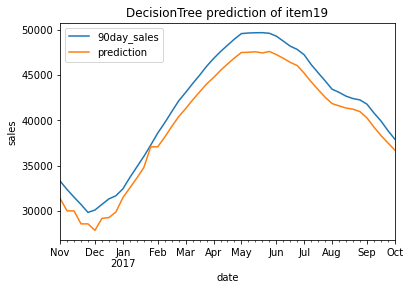

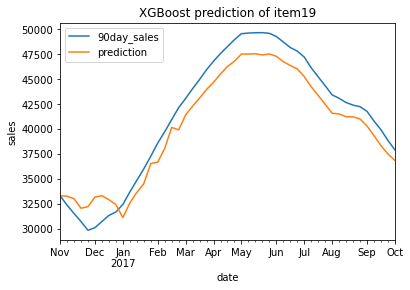

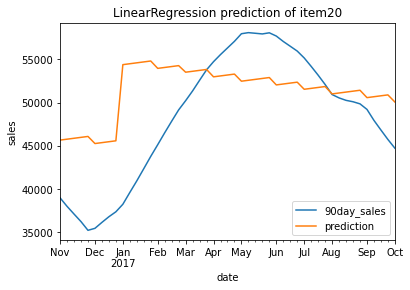

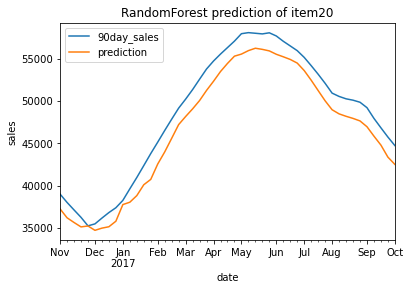

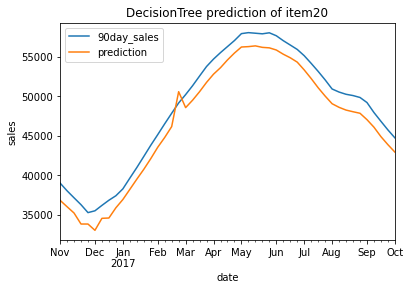

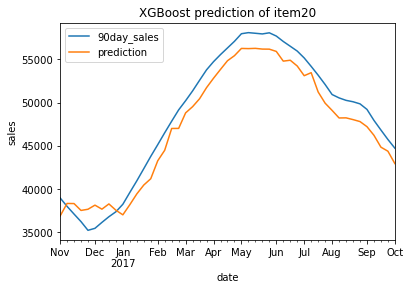

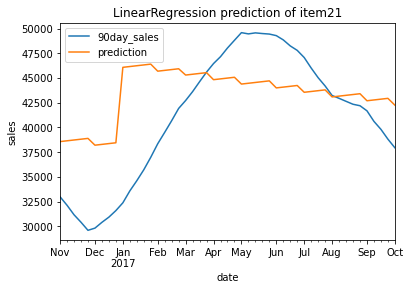

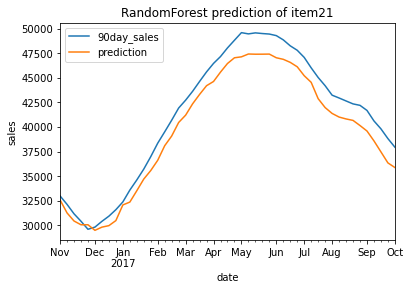

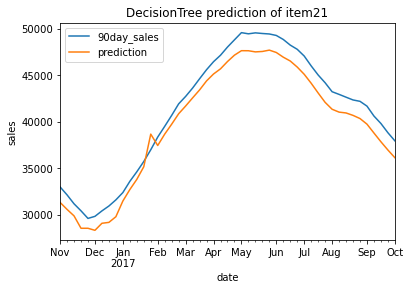

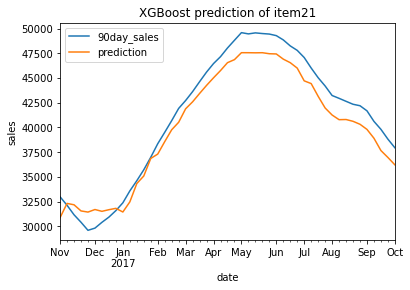

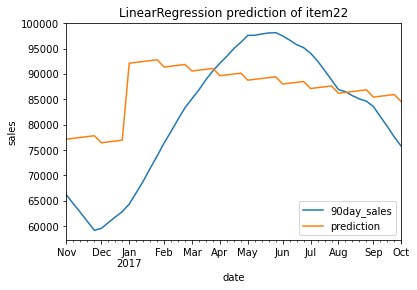

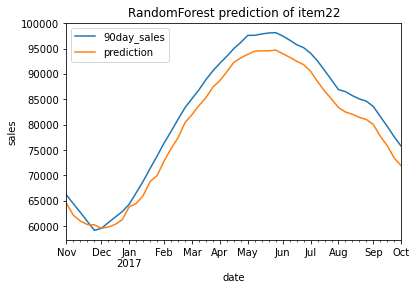

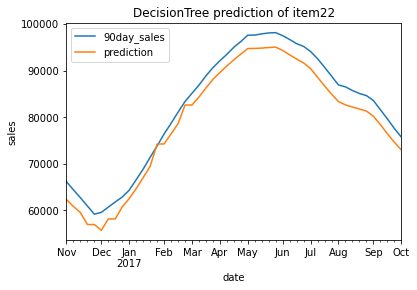

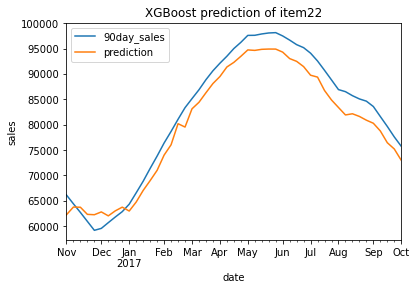

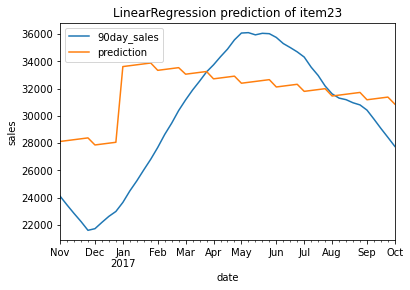

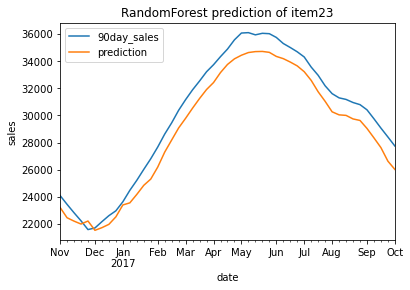

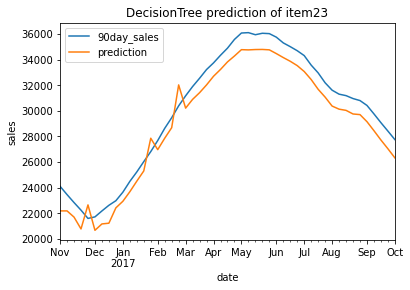

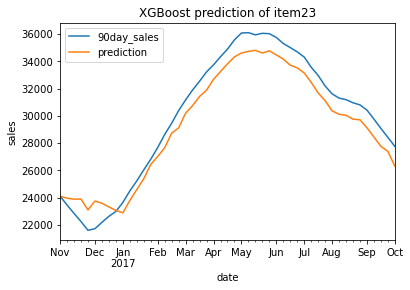

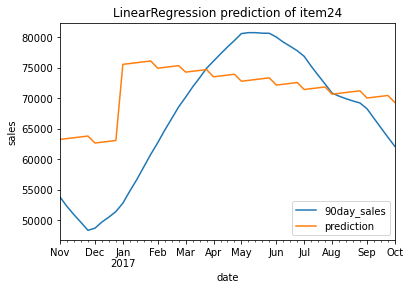

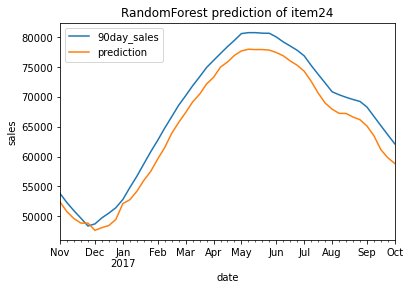

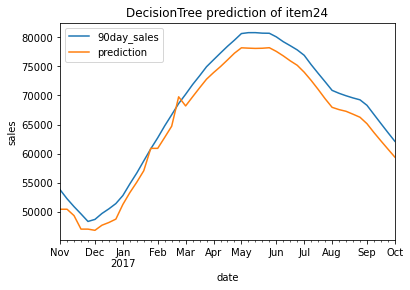

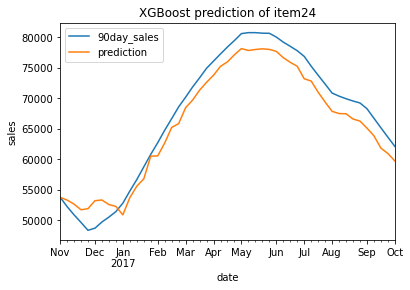

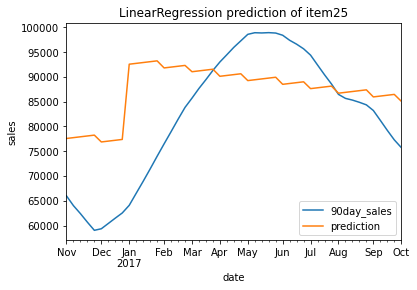

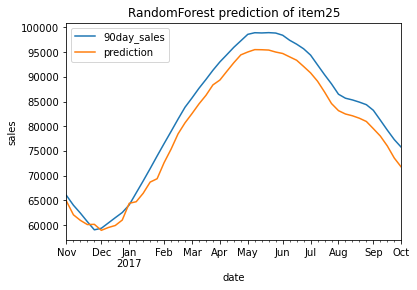

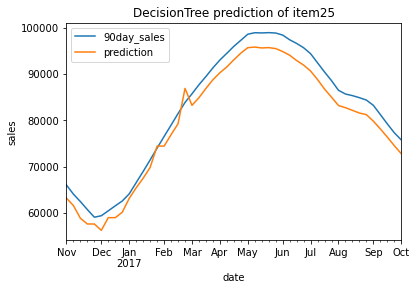

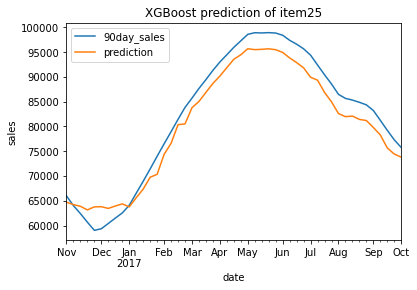

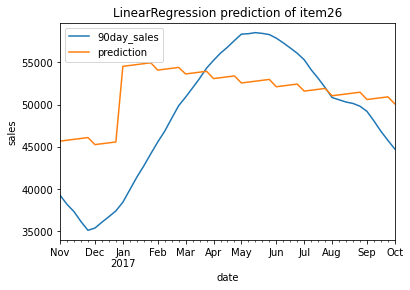

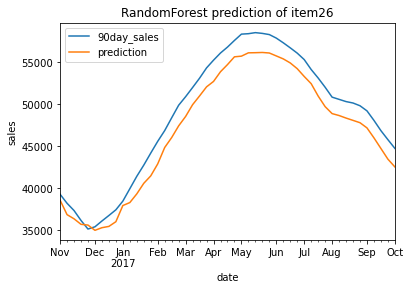

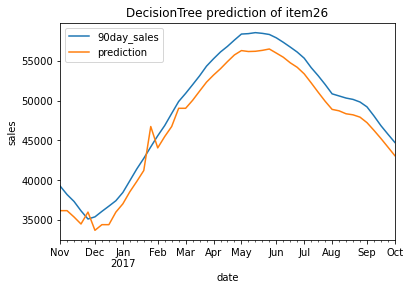

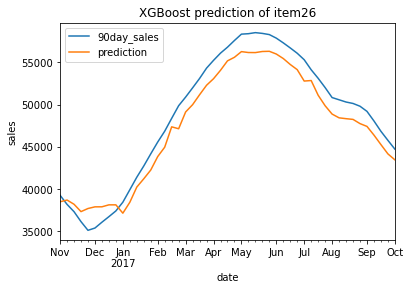

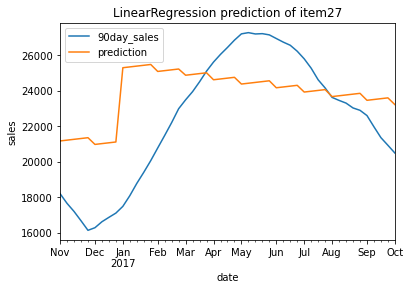

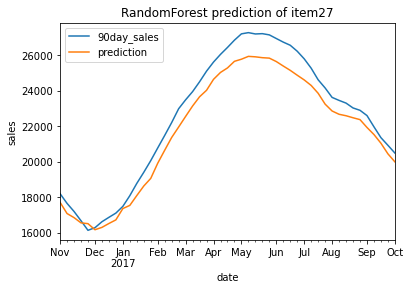

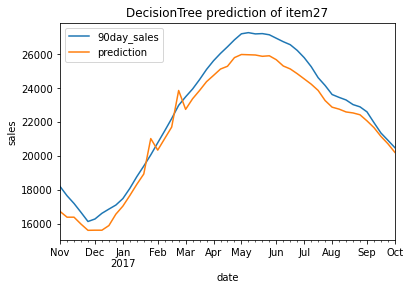

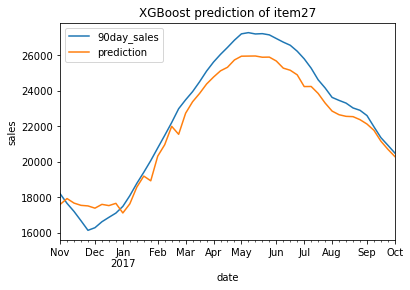

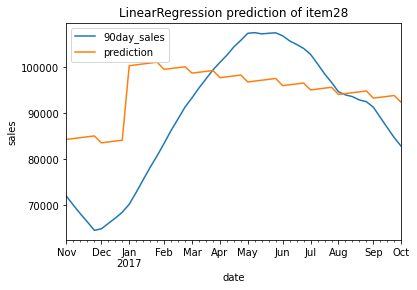

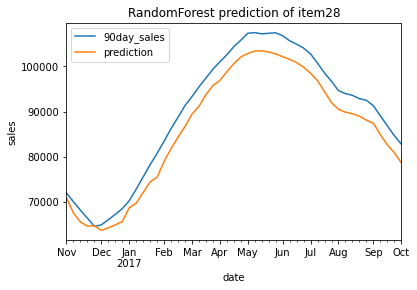

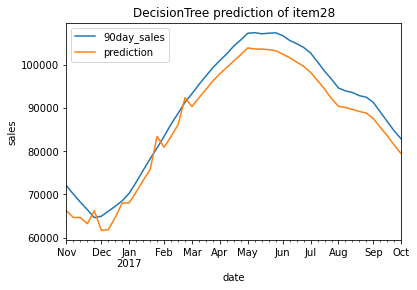

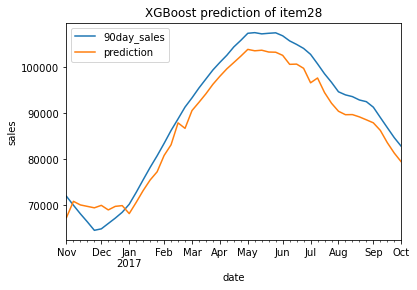

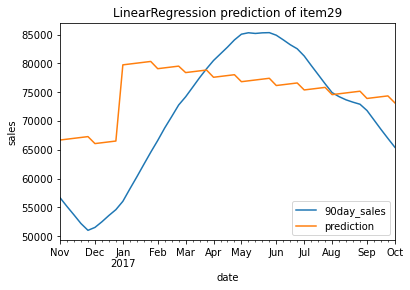

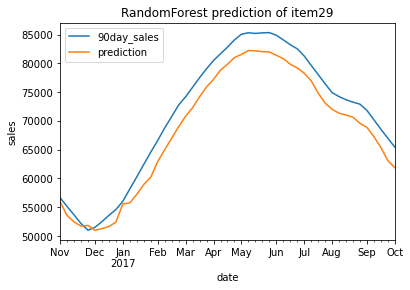

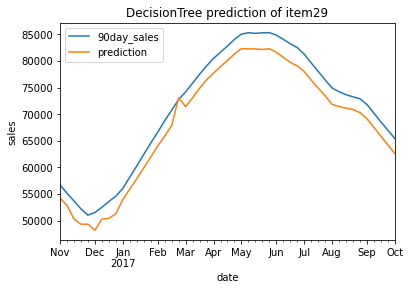

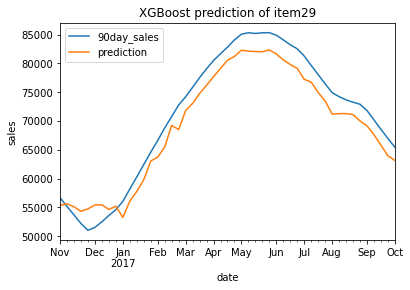

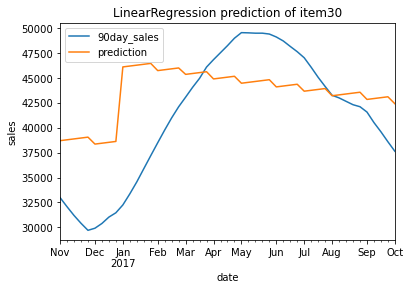

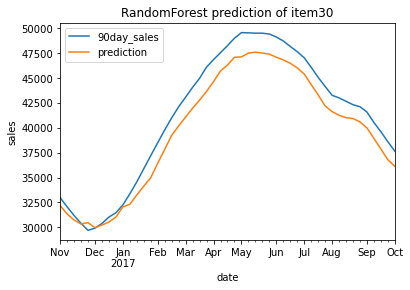

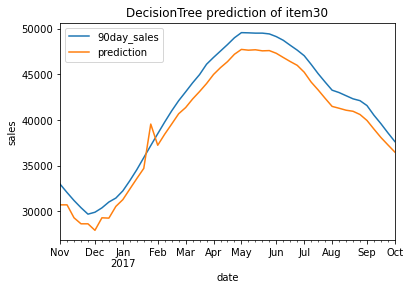

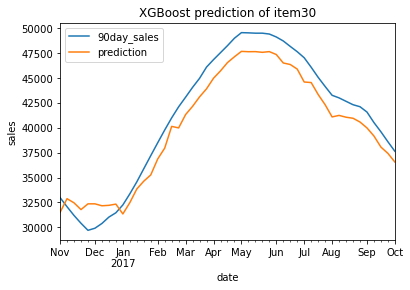

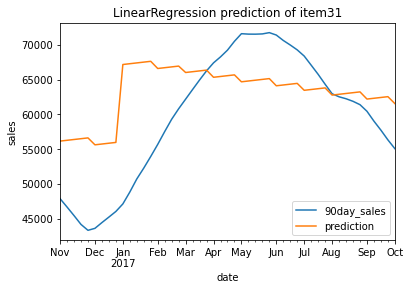

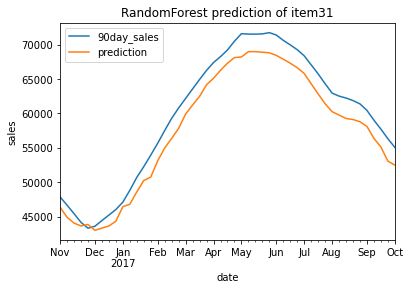

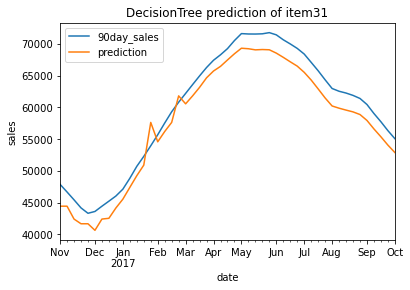

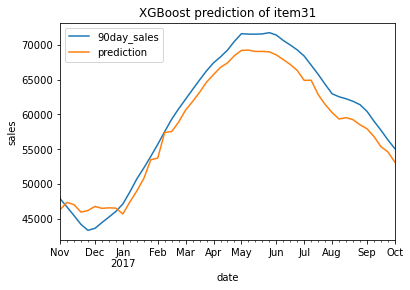

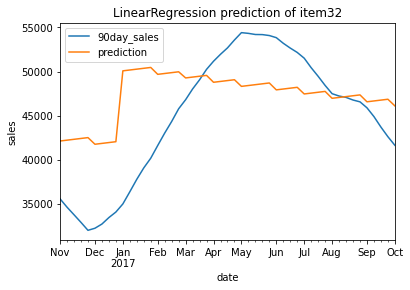

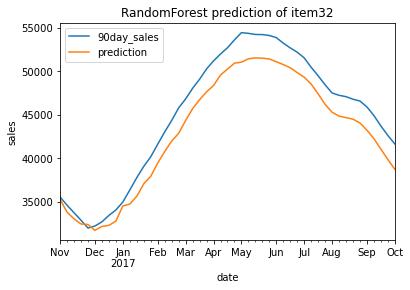

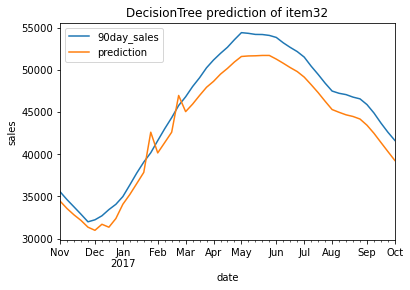

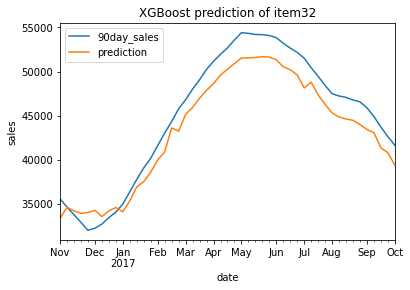

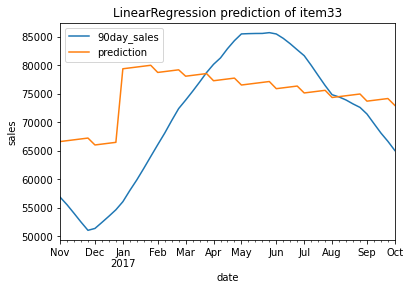

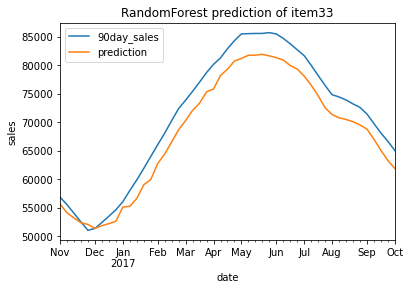

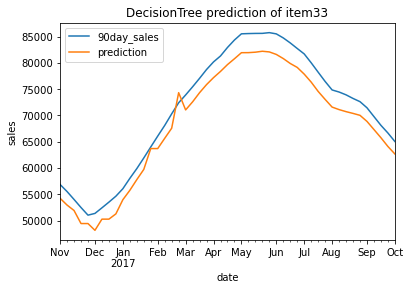

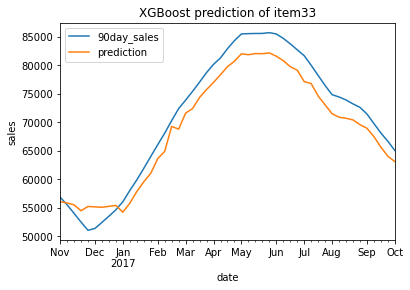

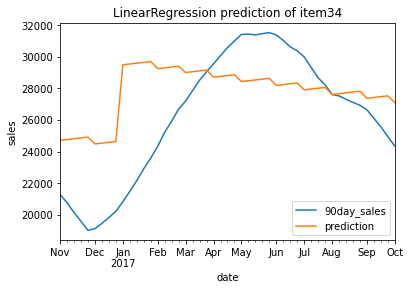

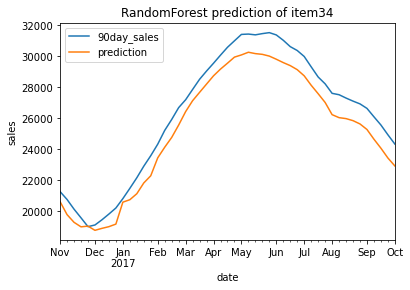

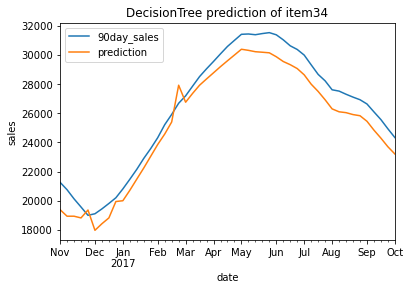

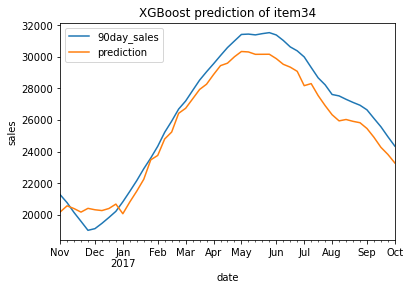

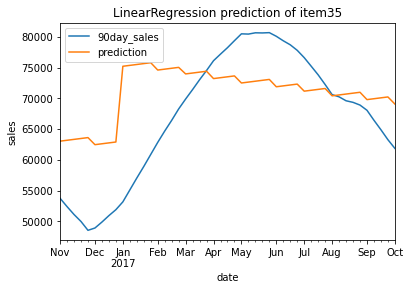

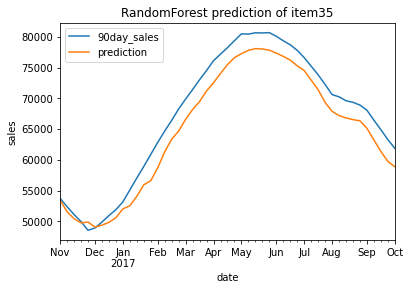

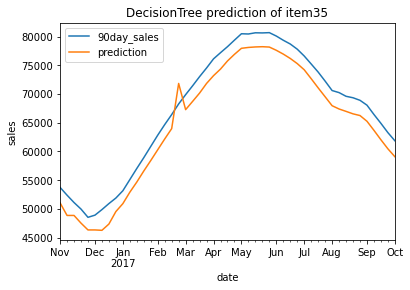

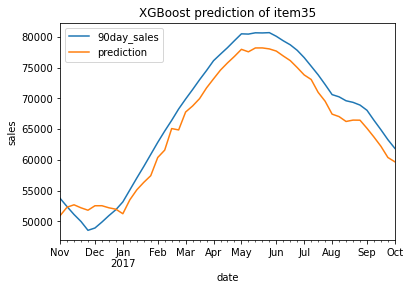

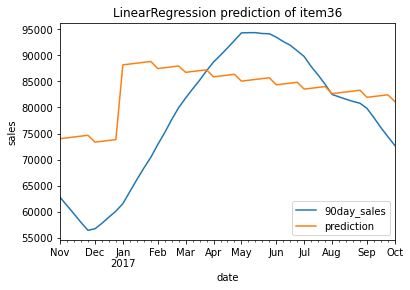

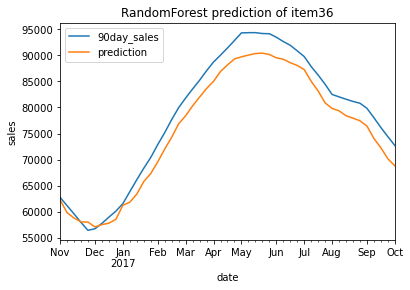

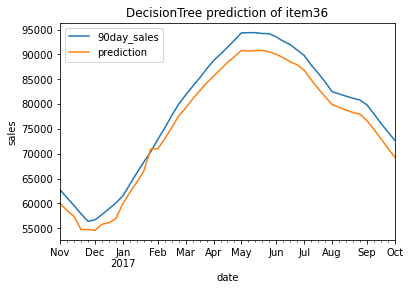

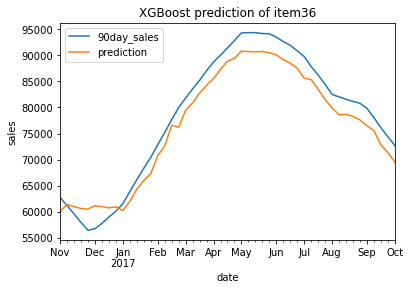

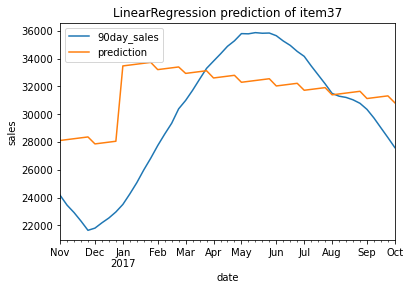

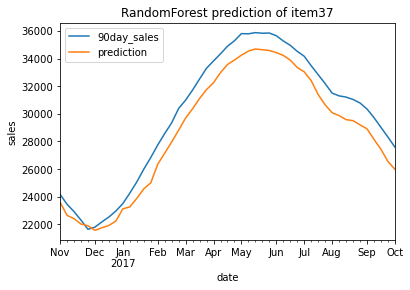

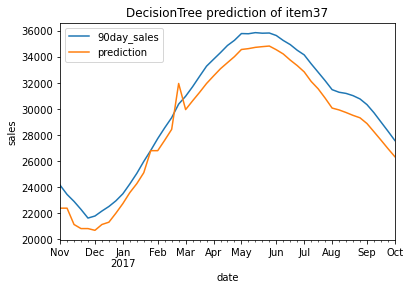

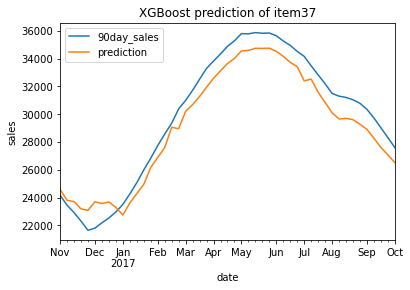

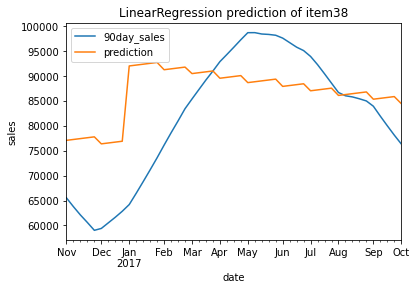

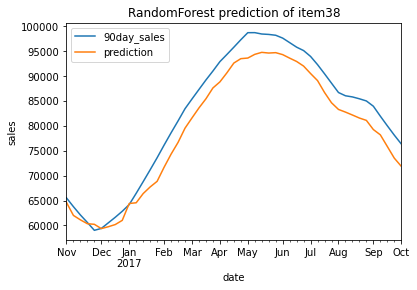

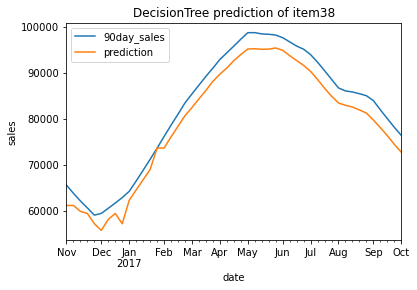

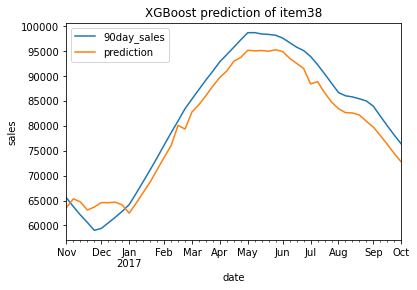

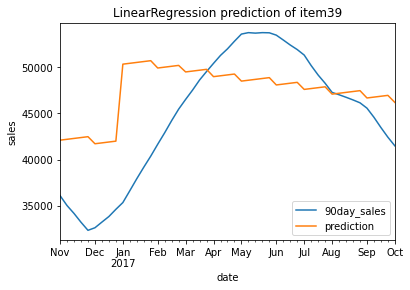

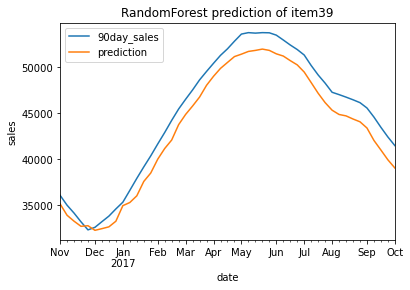

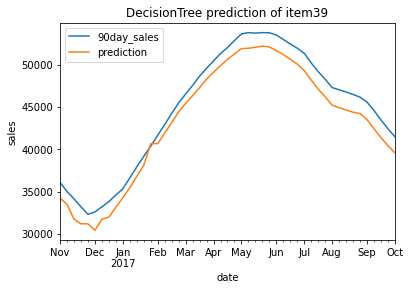

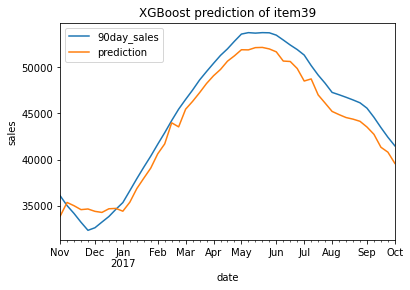

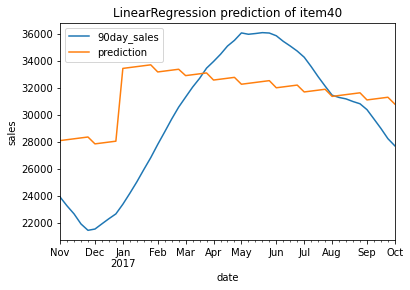

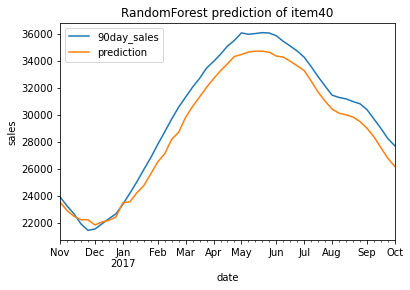

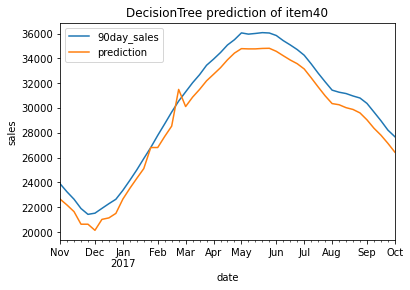

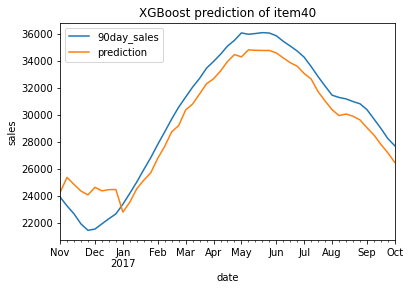

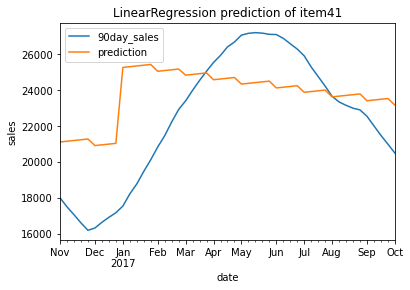

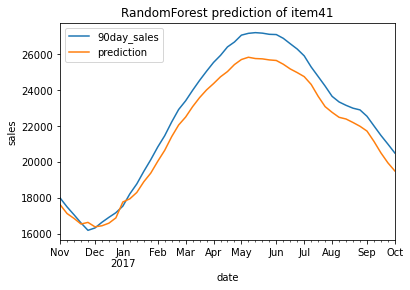

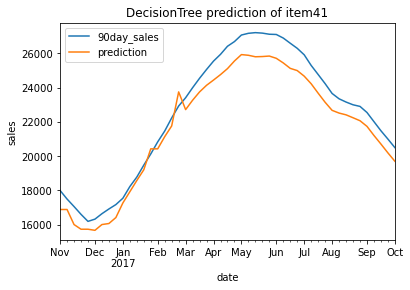

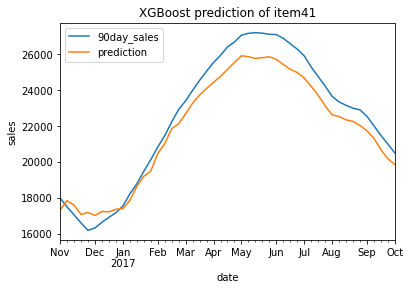

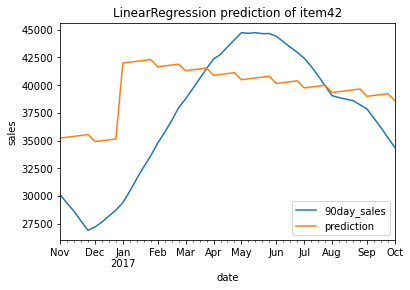

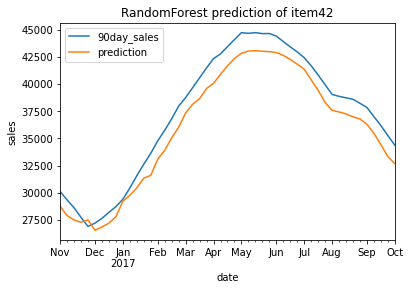

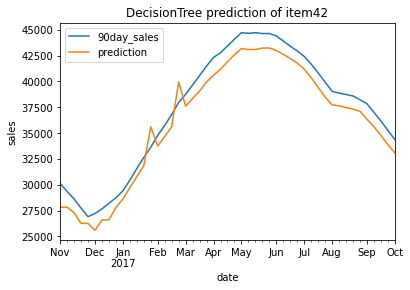

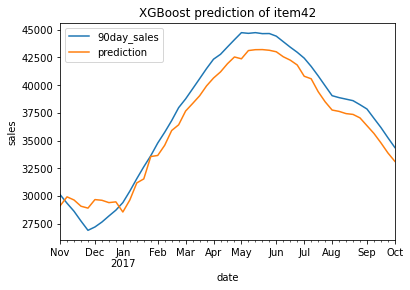

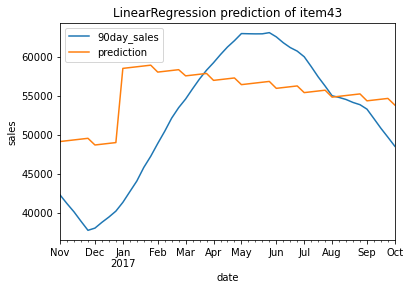

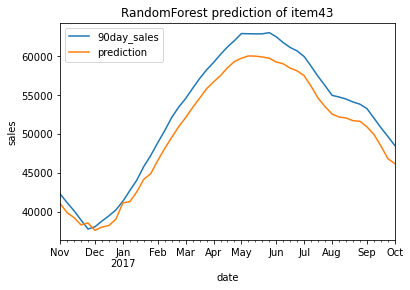

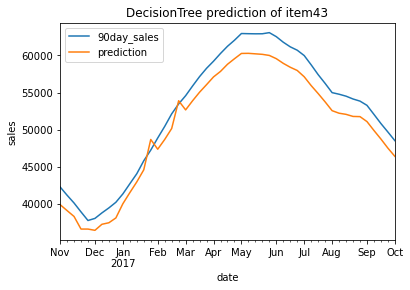

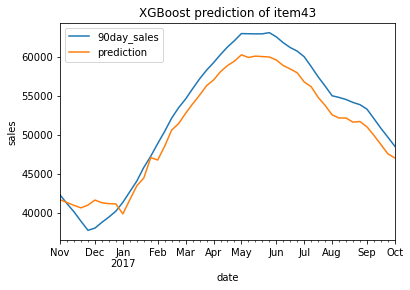

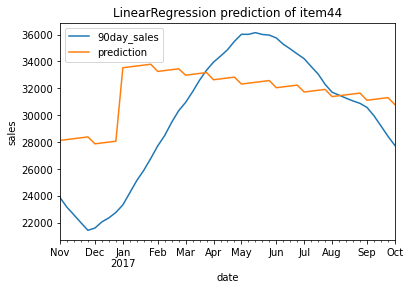

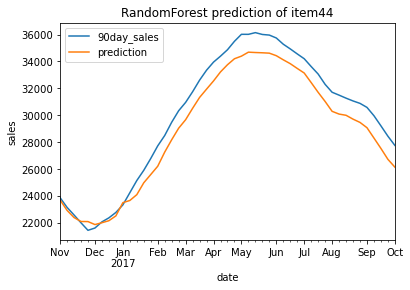

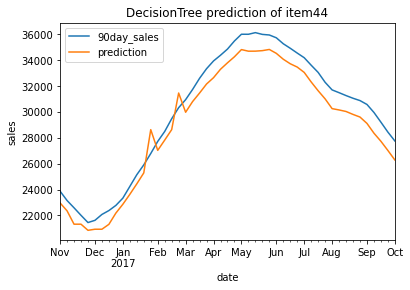

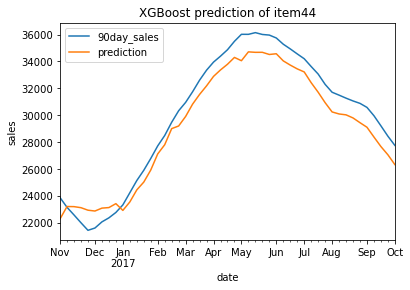

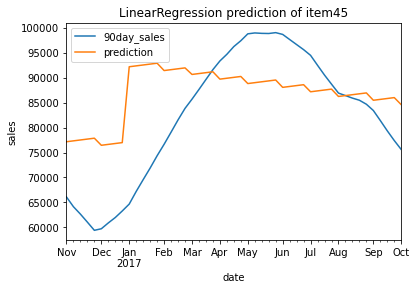

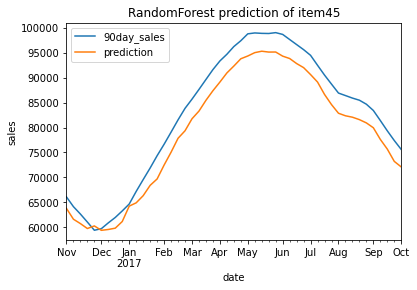

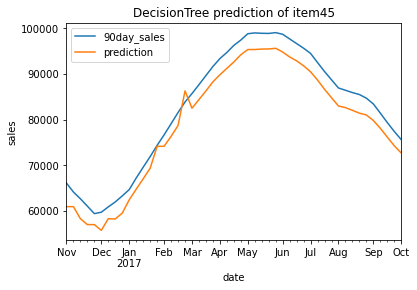

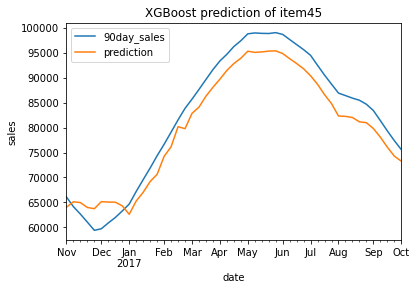

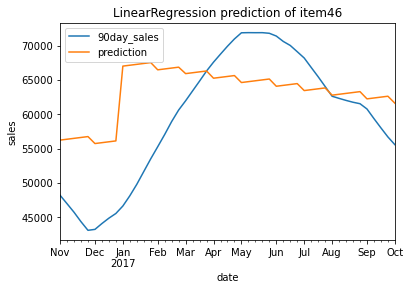

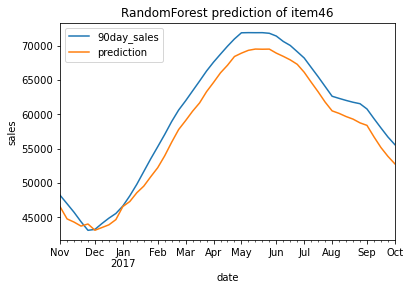

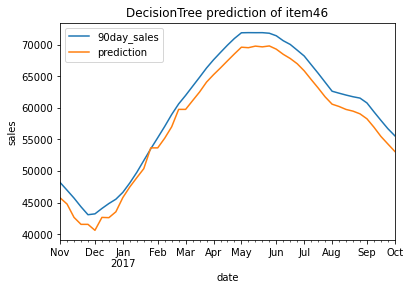

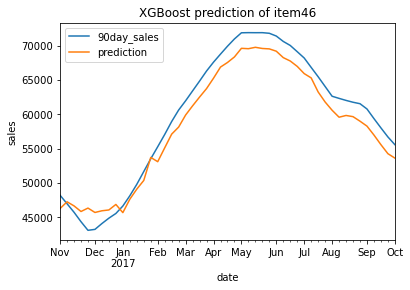

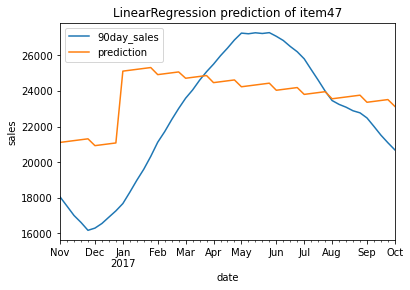

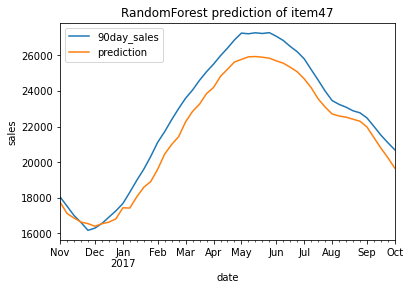

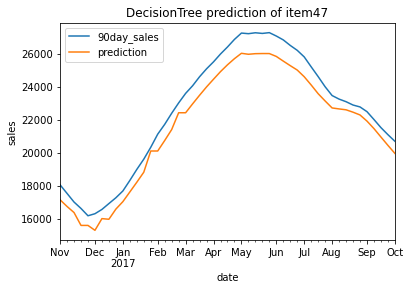

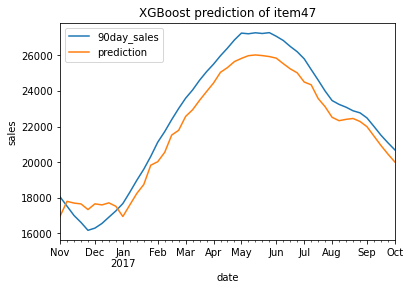

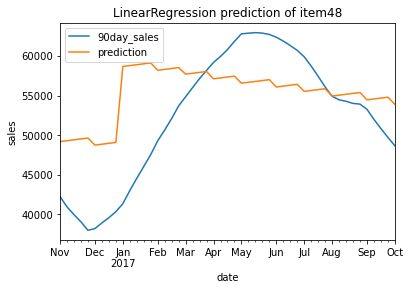

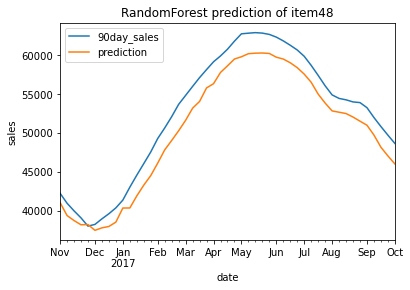

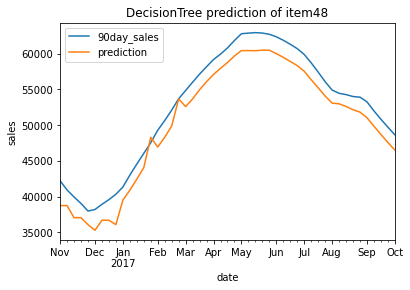

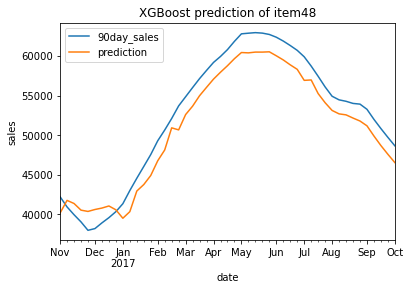

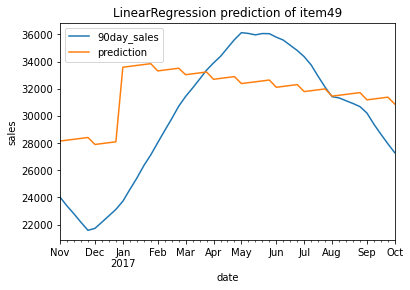

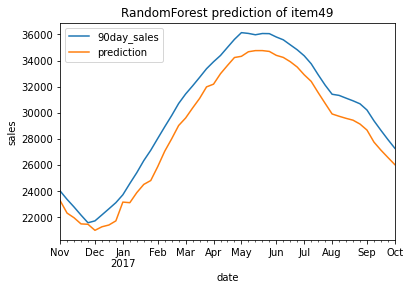

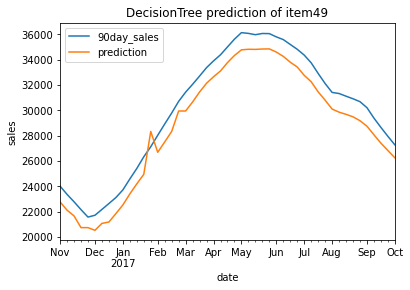

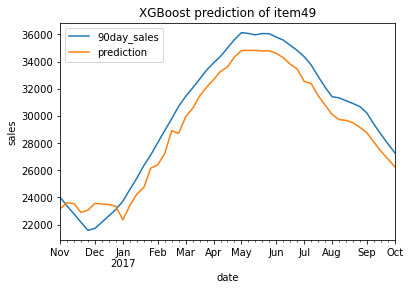

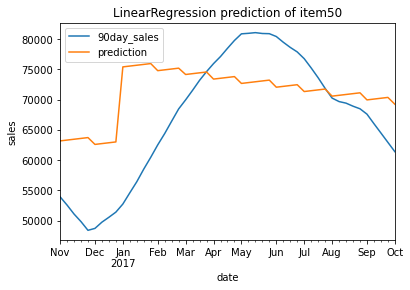

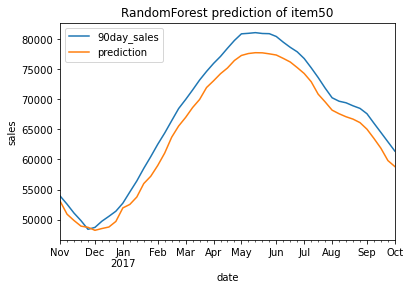

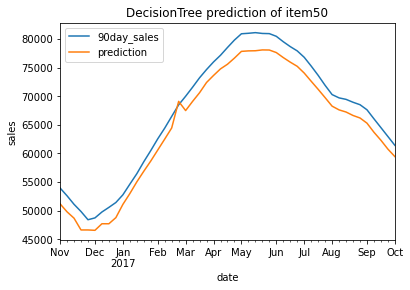

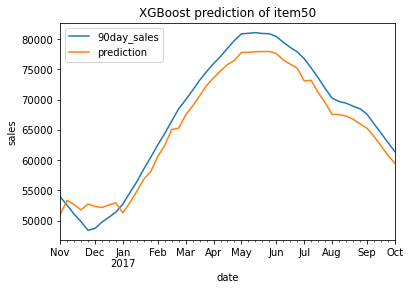

In [40]:
for i in range(1,51):
    df_item=d2[d2['item']==i]
    df_item['90day_sales']=df_item['sales'].rolling(90).sum()
    df_item=df_item.shift(-89)
    df_item=df_item.iloc[::7]
    df_item.drop(['item','sales'],axis=1,inplace=True)
    df_item# it gives information about next 90days sales data of item1.
    
    df_item.reset_index(inplace=True)
    df_item['day']=df_item['date'].dt.day
    df_item['week']=df_item['date'].dt.week
    df_item['year']=df_item['date'].dt.year
    df_item.dropna(inplace=True)
    df_item.set_index('date',inplace=True)
    
    X_train=df_item.drop(['90day_sales'],axis=1).iloc[:200]
    X_test=df_item.drop(['90day_sales'],axis=1).iloc[200:]

    Y_train=df_item['90day_sales'].iloc[:200]
    Y_test=df_item['90day_sales'].iloc[200:]
    
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title='LinearRegression prediction of item'+str(i))
    l.append(lr)
    r2.append(r2_score(Y_test,pred))
    #print('The r2_score of linear regression of item'+str(i),r2_score(Y_test,pred))
    
    
    rf=RandomForestRegressor()
    rf.fit(X_train,Y_train)
    pred=rf.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title='RandomForest prediction of item'+str(i))
    l.append(rf)
    r2.append(r2_score(Y_test,pred))
    #print('The r2_score of RandomForest of item'+str(i),r2_score(Y_test,pred))
    
    dt=DecisionTreeRegressor()
    dt.fit(X_train,Y_train)
    pred=dt.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title='DecisionTree prediction of item'+str(i))
    l.append(dt)
    r2.append(r2_score(Y_test,pred))
    
    import xgboost as xgb 
    xgb=xgb.XGBRegressor()
    xgb.fit(X_train,Y_train)
    pred=xgb.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title='XGBoost prediction of item'+str(i))
    l.append(xgb)
    r2.append(r2_score(Y_test,pred))
    #print('The r2_score of XGBoost of item'+str(i),r2_score(Y_test,pred))
    
    k=r2.index(max(r2))
    print("The best r2_score for item"+str(i)+" achieved using",model[k],'and score is',max(r2))
    r2=[]
    best.append(l[k])
    l=[]
    
    

In [41]:
len(best)

50

### Let us predict next 90days demand for our desired item

In [42]:
j=int(input('enter item number:'))
d=input('enter date in YYYY-MM-DD format:')
d=datetime.fromisoformat(d).date()
p=[d.day,d.isocalendar()[1],d.year]
p=np.array(p).reshape((1,-1))
print('The predicted next 90day sales for item '+str(j)+' are',best[j-1].predict(p))

enter item number:1
enter date in YYYY-MM-DD format:2016-11-15
The predicted next 90day sales for item 1 are [17177.441]
